# Tobigs15th Week1 EDA 과제 - 15기 이성범

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

# 1. 데이터 불러오기

- datetime : 날짜
 - 연-월-일 시:분:초
- season: 계절
 - 1 = 봄
 - 2 = 여름
 - 3 = 가을
 - 4 = 겨울
- holiday: 공휴일
 - 1 = 공휴일O
 - 0 = 공휴일X
- workingday: 근무일
 - 1 = 근무일O
 - 0 = 근무일X

- weather: 날씨
 - 1 = Clear, Few clouds, Partly cloudy, Partly cloudy (아주 좋은 날씨)
 - 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (좋은 날씨)
 - 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (좋지 않은 날씨)
 - 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (아주 좋지 않은 날씨)
- temp: 섭씨 온도
- atemp: 체감 온도
- humidity: 습도
- windspeed: 풍속
- casual: 비회원의 대여량 
- registered: 회원의 대여량
- count: 전체 대여량 (casual + registered)

In [2]:
df = pd.read_csv('과제데이터.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [5]:
df.sample(10)

datetime  season  holiday  workingday  weather   temp  \
10162  2012-11-08 20:00:00       4        0           1        1  15.58   
4185   2011-10-06 10:00:00       4        0           1        1  21.32   
10632  2012-12-09 10:00:00       4        0           0        2  16.40   
3040   2011-07-15 14:00:00       3        0           1        1  28.70   
2169   2011-05-17 07:00:00       2        0           1        2  21.32   
4746   2011-11-10 20:00:00       4        0           1        2  14.76   
4563   2011-11-03 05:00:00       4        0           1        1  13.12   
4831   2011-11-14 09:00:00       4        0           1        2  19.68   
7415   2012-05-08 08:00:00       2        0           1        2  22.14   
4982   2011-12-01 16:00:00       4        0           1        1  16.40   

        atemp  humidity  windspeed  casual  registered  count  
10162  19.695        29    31.0009      10         235    245  
4185   25.000        52     0.0000      24         105    129  
10632  20.455        87    19.0012      39         180    219  
3040   32.575        51    12.9980     105         160    265  
2169   25.000        94    16.9979      13         138    151  
4746   16.665        62    19.0012       8         160    168  
4563   16.665        81     8.9981       1          27     28  
4831   23.485        67    22.0028      29         204    233  
7415   25.760        73    19.9995      36         605    641  
4982   20.455        40    12.9980       9         192    201

# 2. EDA

### 날짜 : datetime

### 범주형 변수 : season, holiday, workingday, weathe

### 수치형 변수 : temp, atemp, humidity, windspeed

### target : casual + registered == count (수치형 변수)

In [6]:
counts = df[df['casual'] + df['registered'] == df['count']]['count'].count()
print(f'casual + registered == count 의 개수   : {counts}')
print(f'전체 데이터의 개수                     : {df.shape}')
print(f'casual + registered 와 count는 같은가? : {df.shape[0] == counts}')

casual + registered == count 의 개수   : 10886
전체 데이터의 개수                     : (10886, 12)
casual + registered 와 count는 같은가? : True


casual + registered 와 count가 같기 때문에 예측을 시행한다면 

1. casual과 registered로 나누어 예측 후 더한다.
2. count만을 예측한다.

2가지 방법으로 나눌 수 있음

## 과제1. 결측치 처리

In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

결측치는 존재하지 않는다. 

하지만 앞으로의 분석 결과(datetime-day)을 보면 20일 ~ 31일 까지의 데이터는 존재하지 않는다는 것을 알 수 있다.

또한 2011년 3월 10일의 humidity 측정 값이 하루 동안 0으로 측정되어있는데 이날 humidity 측정기가 고장이 난것으로 판단되는 결측치가 존재한다.

따라서 **주어진 데이터는 2011년과 2012년의 각 월별 19일까지의 공유 자전거 대여량에 대한 데이터인 것으로 알 수 있다.**

## 과제2. 유의미한 시각화 10개 이상

## datetime : 날짜
 - 연-월-일 시:분:초

In [8]:
# 날짜 칼럼으로 변환
df['datetime'] = df['datetime'].apply(pd.to_datetime)

<AxesSubplot:xlabel='datetime', ylabel='count'>

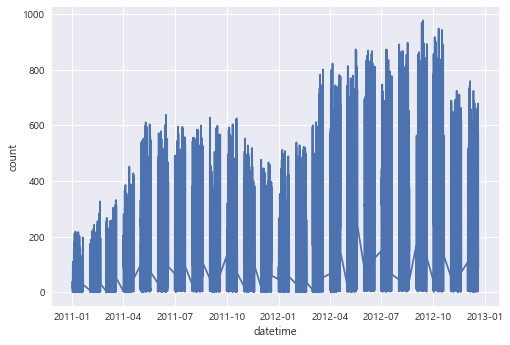

In [9]:
sns.lineplot(x='datetime', y='count', data=df)

전체 데이터를 가지고 시각화를 하면 한눈에 보기가 어려움

따라서 년/월/일/시/요일 등으로 구분하여 시각화가 필요함

<h3> 분석 순서 </h3>

1. 날짜 칼럼을 연, 월, 일, 시로 구분하여 새로운 칼럼을 생성한다. (분, 초의 경우 모든 값이 0 이므로 의미 없는 칼럼으로 생각되어 생성하지 않음)
 - datetime-year : 년도를 나타내는 칼럼
 - datetime-month : 월을 나타내는 칼럼
 - datetime-day : 일을 나타내는 칼럼
 - datetime-hour: 시간을 나타내는 칼럼
2. 요일을 나타내는 칼럼을 새롭게 생성한다.
 - datetime-dayofweek : 요일을 구분한 칼럼
  - 0 : 월, 1 : 화, 2 : 수, 3 : 목, 4 : 금, 5 : 토, 6 : 일
3. 타겟과의 연관성을 찾기 위해 시각화를 한다,

In [10]:
# 연,월,일,시 칼럼 생성
df['datetime-year'] = df.datetime.dt.year
df['datetime-month'] = df.datetime.dt.month
df['datetime-day'] = df.datetime.dt.day
df['datetime-hour'] = df.datetime.dt.hour

# 요일 칼럼 생성
df['datetime-dayofweek'] = df.datetime.dt.dayofweek

In [11]:
cols = ['datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-dayofweek']
df.describe()[cols]

datetime-year  datetime-month  datetime-day  datetime-hour  \
count   10886.000000    10886.000000  10886.000000   10886.000000   
mean     2011.501929        6.521495      9.992559      11.541613   
std         0.500019        3.444373      5.476608       6.915838   
min      2011.000000        1.000000      1.000000       0.000000   
25%      2011.000000        4.000000      5.000000       6.000000   
50%      2012.000000        7.000000     10.000000      12.000000   
75%      2012.000000       10.000000     15.000000      18.000000   
max      2012.000000       12.000000     19.000000      23.000000   

       datetime-dayofweek  
count        10886.000000  
mean             3.013963  
std              2.004585  
min              0.000000  
25%              1.000000  
50%              3.000000  
75%              5.000000  
max              6.000000

In [12]:
# 데이터 시각화를 위한 함수를 만듬
def get_barplot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.barplot(x=cols, y=target, data = data, hue = hue)
    plt.title(title)

def get_pointplot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.pointplot(x=cols, y=target, data = data, hue = hue)
    plt.title(title)

def get_boxplot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.boxplot(x=cols, y=target, data = data, hue = hue)
    plt.title(title)

def get_countplot(cols, data, title, hue = None):
    plt.figure(figsize=(12,8))
    sns.countplot(x=cols, data = data, hue = hue)
    plt.title(title)

### datetime-year : 년도를 나타내는 칼럼

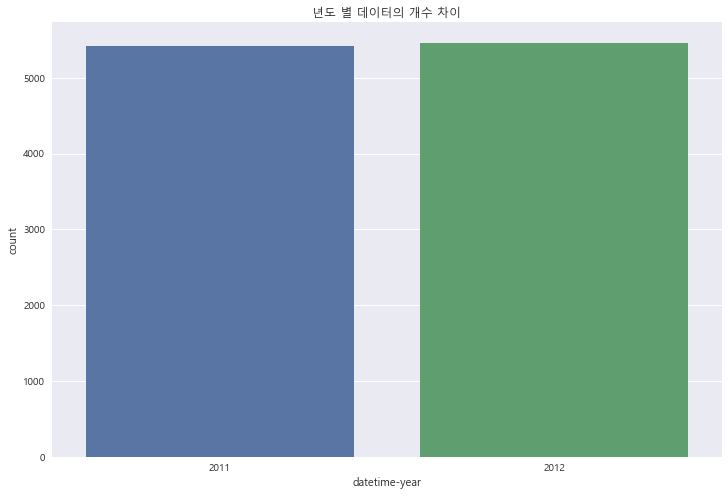

In [13]:
get_countplot('datetime-year', df, '년도 별 데이터의 개수 차이')

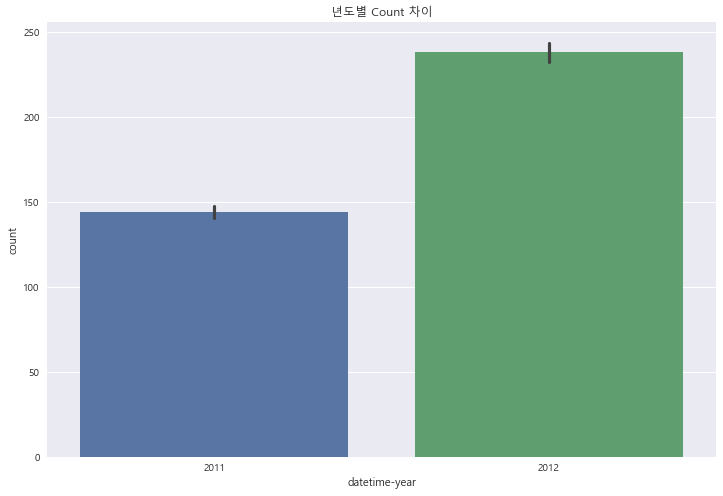

In [14]:
get_barplot('datetime-year', 'count', df, '년도별 Count 차이')

2012년이 2011년 보다 대여량이 훨씬 많다는 것을 알 수 있음

그러나 2011년이 대여 시작 초기이므로 대여량이 상대적으로 적을 수도 있음

후에 다른 칼럼에 따른 Count 분석을 보면 년도별로 각 칼럼에 따른 대여량의 추세가 비슷하다는 것을 알 수 있음

따라서 datetime-year 칼럼은 2012년에 비해서 상대적으로 대여량이 적은것 뿐이지 다른 칼럼에 따른 대여량의 추세가 각 년도별로 비슷하기 때문에 **유의미한 차이를 가져다주는 칼럼은 아님**

### datetime-month : 월을 나타내는 칼럼

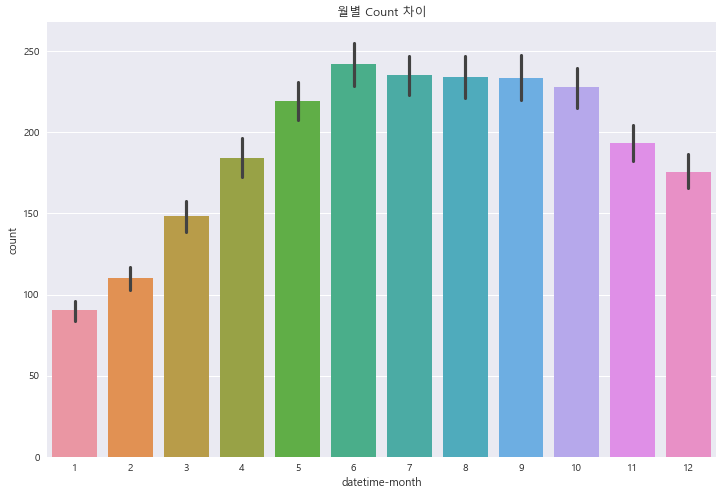

In [15]:
get_barplot('datetime-month', 'count', df, '월별 Count 차이')

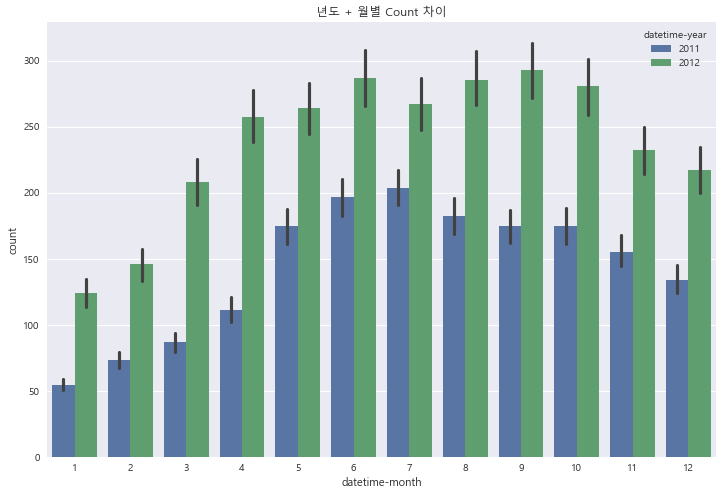

In [16]:
get_barplot('datetime-month', 'count', df, '년도 + 월별 Count 차이', hue='datetime-year')

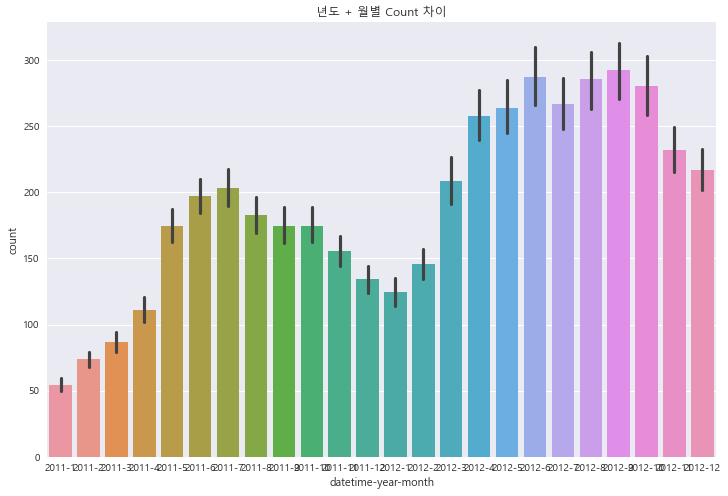

In [17]:
# 년도와 월을 한꺼번에 보기 위해서 두개를 붙임
df['datetime-year-month'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str')
get_barplot('datetime-year-month', 'count', df, '년도 + 월별 Count 차이')

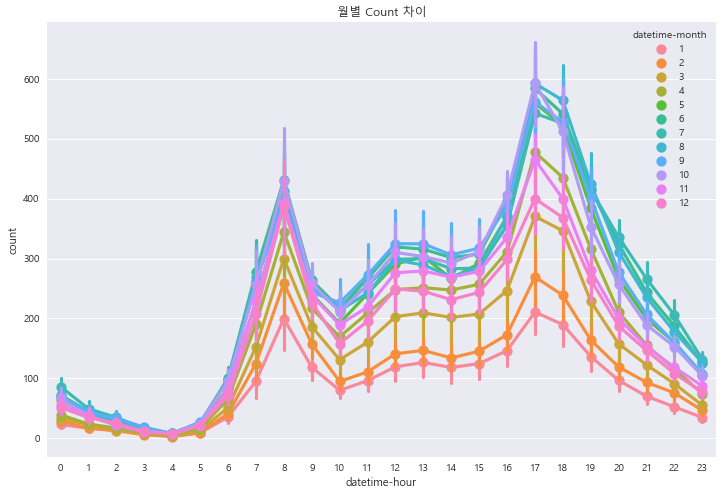

In [18]:
get_pointplot('datetime-hour', 'count', df, '월별 Count 차이', hue='datetime-month')

1, 2, 3, 11, 12월이 상대적으로 대여량이 적은 것으로 관찰됨

이는 대게 겨울을 나타내는 달이기 때문에 계절, 온도 등의 칼럼과의 연관성이 높을 것으로 생각된다. 또한 겨울에 대여량이 적은 것은 온도가 춥다면? 눈이 온다면 등 날씨와의 연관성도 높을 것으로 생각된다.

따라서 datetime-month 칼럼의 경우 월별에 따른 대여량의 차이가 발생하므로 **유의미한 차이를 가져다주는 칼럼이다.**

### datetime-day : 일을 나타내는 칼럼

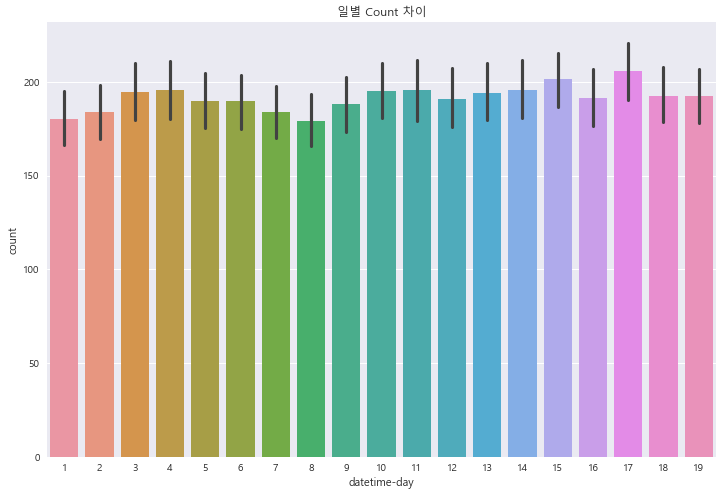

In [19]:
get_barplot('datetime-day', 'count', df, '일별 Count 차이')

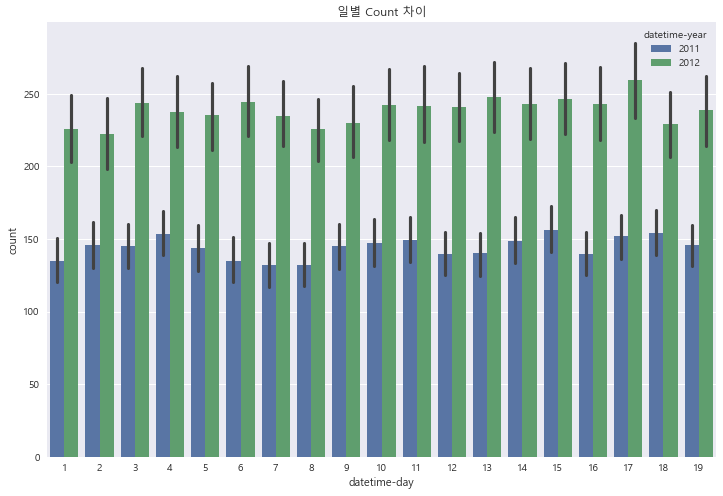

In [20]:
get_barplot('datetime-day', 'count', df, '일별 Count 차이', hue='datetime-year')

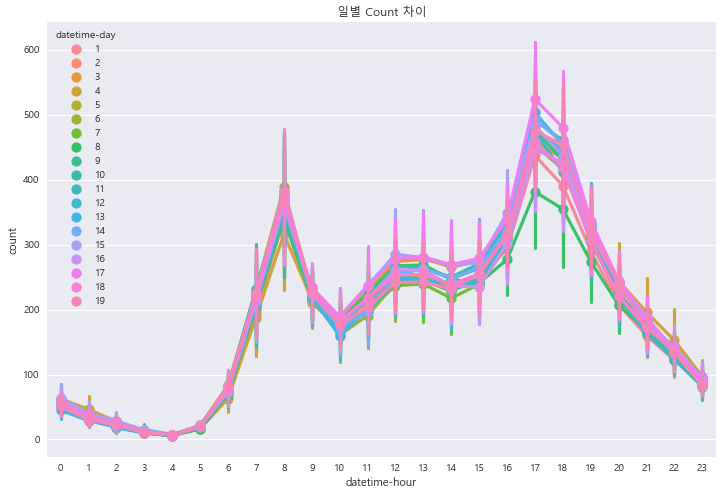

In [21]:
get_pointplot('datetime-hour', 'count', df, '일별 Count 차이', hue='datetime-day')

datetime-day 칼럼의 경우 대여량에 크게 영향을 주지는 않는 것으로 판단됨

일자보다는 공휴일, 주말 등의 변수가 더 큰 차이를 가져다 줄것으로 예상됨

따라서 datetime-day 칼럼은 대여량에 **유의미한 차이를 가져다주는 변수가 아님**

### datetime-hour: 시간을 나타내는 칼럼

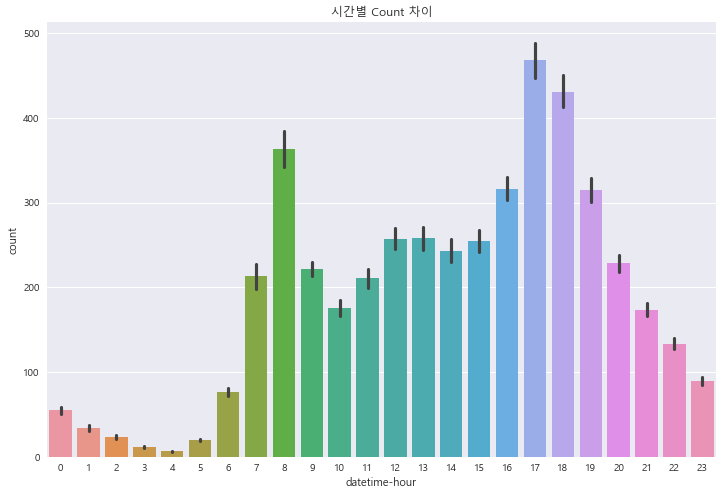

In [22]:
get_barplot('datetime-hour', 'count', df, '시간별 Count 차이')

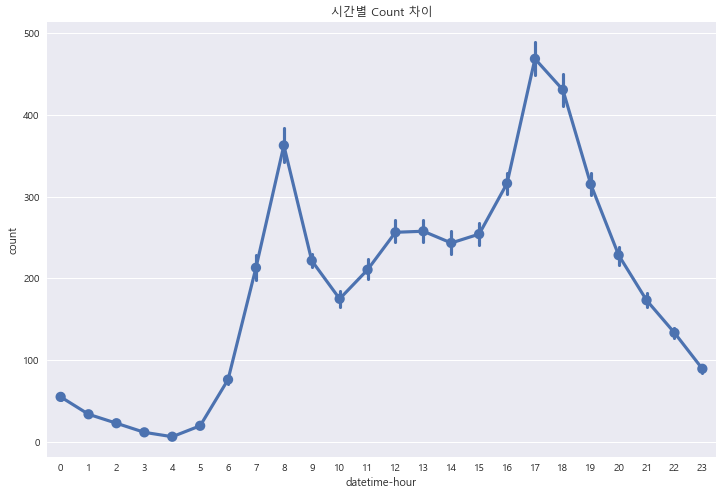

In [23]:
get_pointplot('datetime-hour', 'count', df, '시간별 Count 차이')

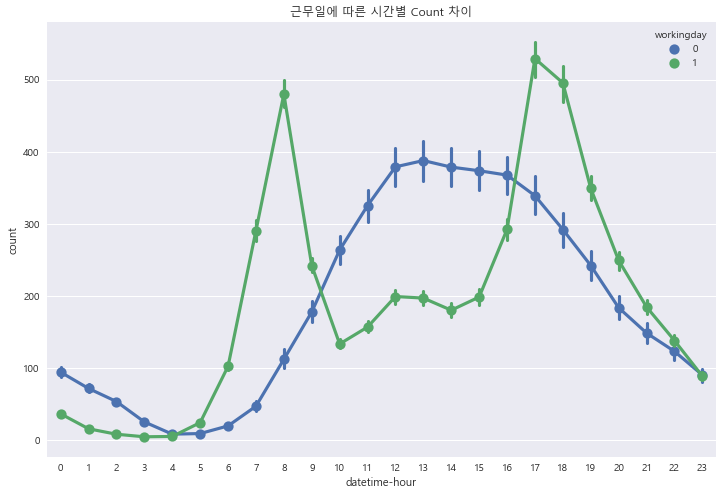

In [24]:
get_pointplot('datetime-hour', 'count', df, '근무일에 따른 시간별 Count 차이', hue='workingday')

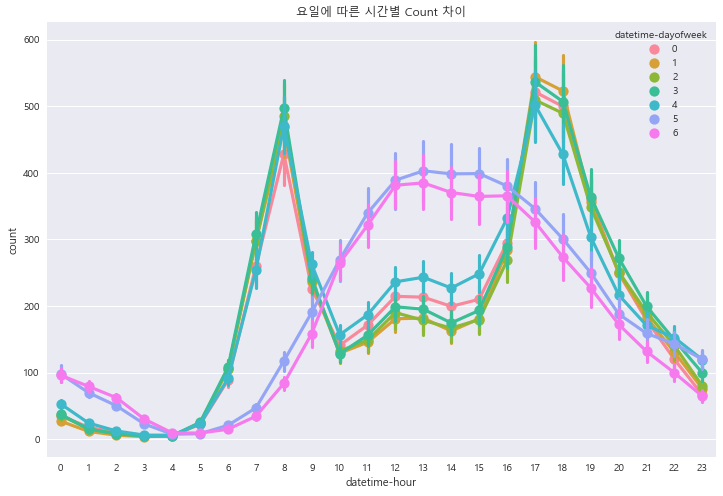

In [25]:
get_pointplot('datetime-hour', 'count', df, '요일에 따른 시간별 Count 차이', hue='datetime-dayofweek')

시간은 대여량에 엄청난 차이를 가져다주는 제일 중요한 컬럼임

평일의 8시, 17시, 18시 등 출퇴근 시간대에 대여량이 급증한다는 것을 알 수 있음

주말, 공휴일 등의 쉬는 날의 경우에는 주로 점심 시간대에 대여량이 많다는 것을 알 수 있음

종합하면 평일의 경우 직장에서 출퇴근을 할 때 대여를 많이 하며 주말의 경우에는 점심 시간대에 나들이를 위해 대여를 한다고 볼 수 있음

따라서 datetime-hour 칼럼의 경우 대여량에 **유의미한 차이를 가져다주는 컬럼임**

### datetime-dayofweek : 요일을 나타내는 칼럼

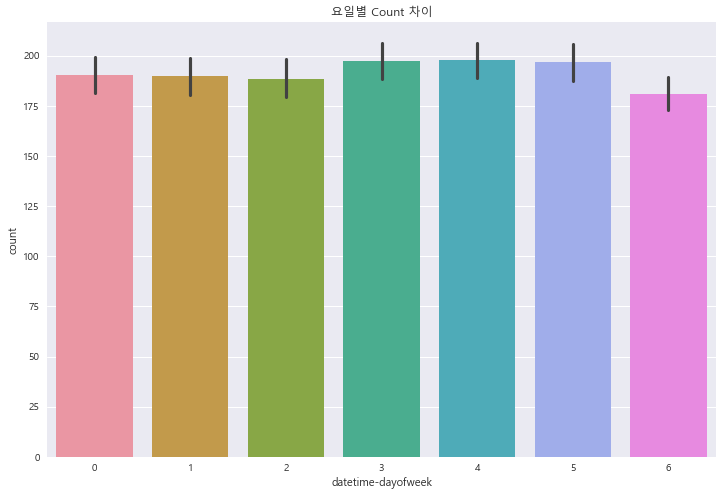

In [26]:
get_barplot('datetime-dayofweek', 'count', df, '요일별 Count 차이')

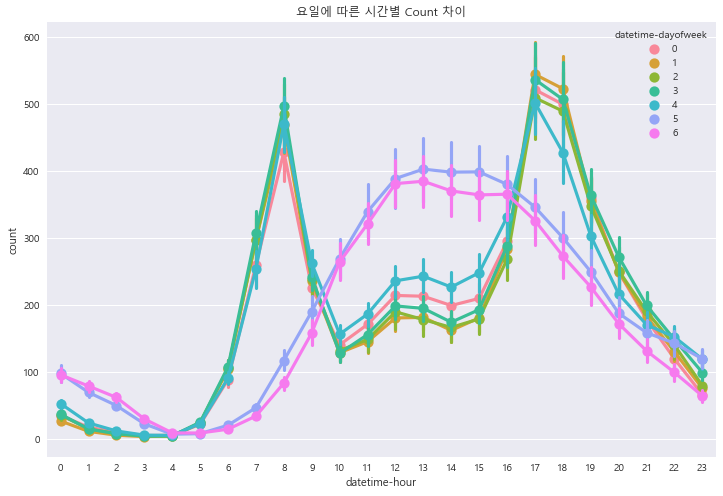

In [27]:
get_pointplot('datetime-hour', 'count', df, '요일에 따른 시간별 Count 차이', hue='datetime-dayofweek')

datetime-dayofweek 칼럼 자체는 대여량에 유의미한 차이를 가져다 주지 않는 것처럼 보이지만 datetime-hour과 함께 시각화 했을 시 주말과 평일에 대여량의 처이가 발생한다는 것을 알 수 있음

따라서 **주말(5, 6)과 평일(0,1,2,3,4)을 나누는 새로운 칼럼을 만드는 것이 필요함**

또한 **datetime-dayofweek 칼럼 자체도 대여량에 유의미한 차이를 가져다주는 칼럼으로 볼 수 있음**

### weekend : 평일과 주말을 나타내는 칼럼

- 1 : 주말
- 0 : 평일

In [28]:
# weekend 칼럼 생성 함수
def get_weekend(x):
    if x in [0,1,2,3,4]:
        return 0
    else: return 1

In [29]:
df['weekend'] = df['datetime-dayofweek'].map(get_weekend)

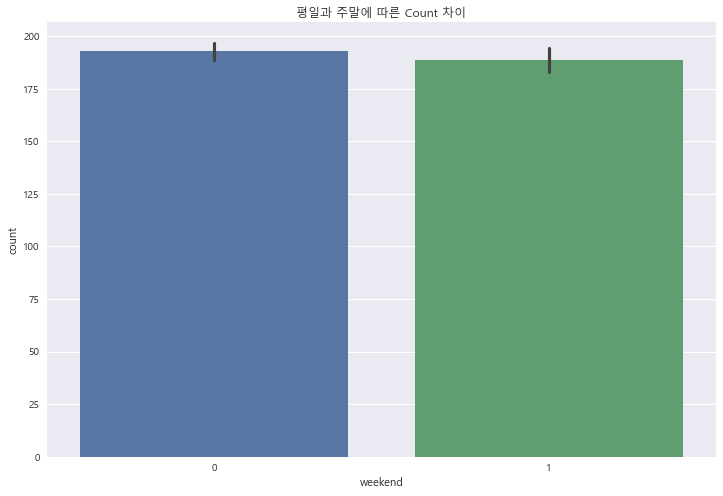

In [30]:
get_barplot('weekend', 'count', df, '평일과 주말에 따른 Count 차이')

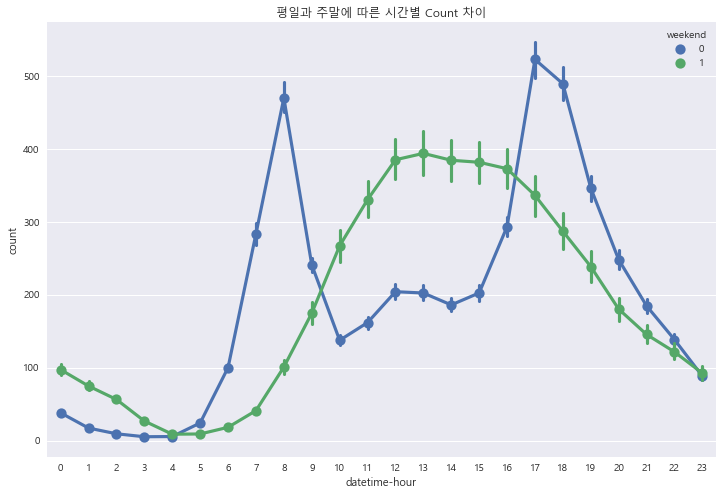

In [31]:
get_pointplot('datetime-hour', 'count', df, '평일과 주말에 따른 시간별 Count 차이', hue='weekend')

weekend 칼럼은 주말과 평일을 나누는 칼럼으로 주말, 평일에 따라 대여량에 차이를 발생한다는 것을 알 수 있음

따라서 **weekend  칼럼은 대여량에 유의미한 차이를 가져다주는 칼럼으로 볼 수 있음**

## season: 계절
 - 1 = 봄
 - 2 = 여름
 - 3 = 가을
 - 4 = 겨울

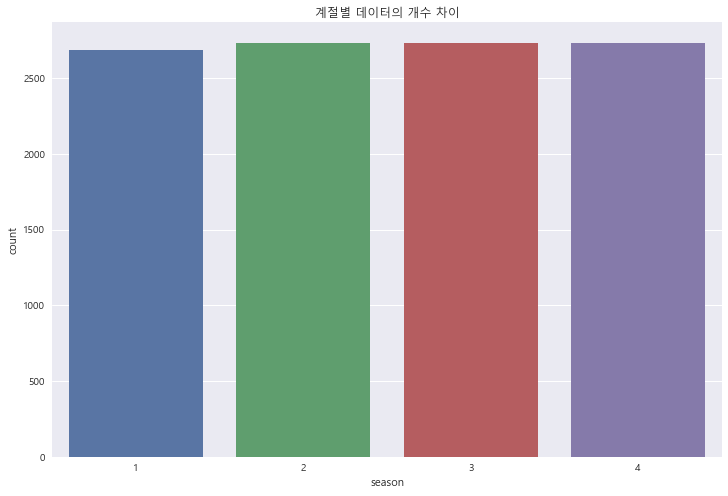

In [32]:
get_countplot('season', df, '계절별 데이터의 개수 차이')

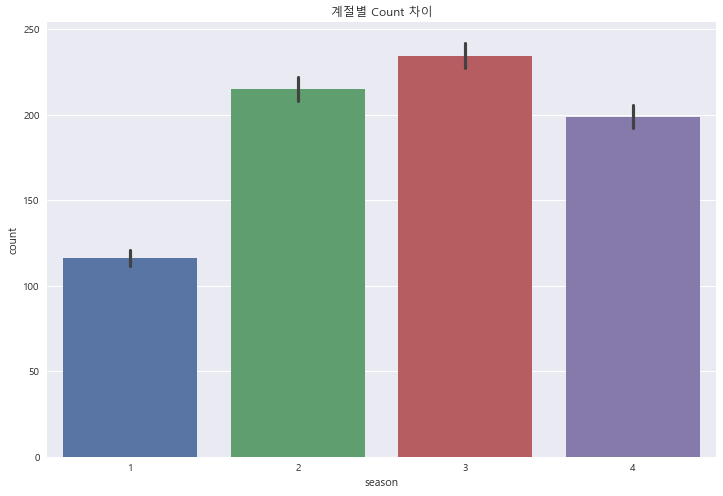

In [33]:
get_barplot('season', 'count', df, '계절별 Count 차이')

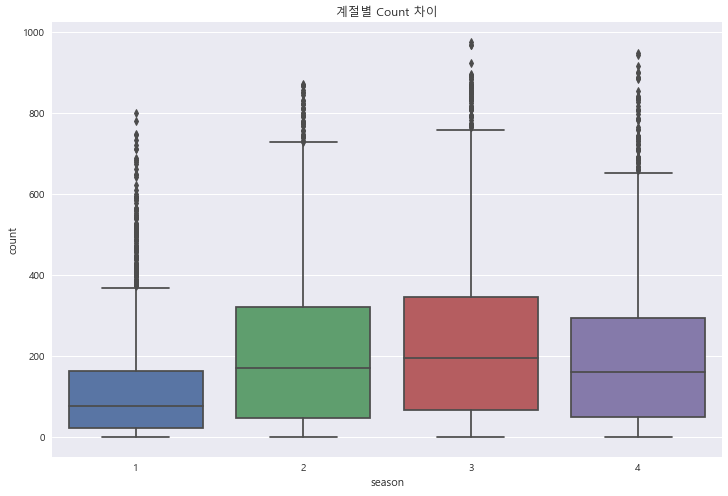

In [34]:
get_boxplot('season', 'count', df, '계절별 Count 차이')

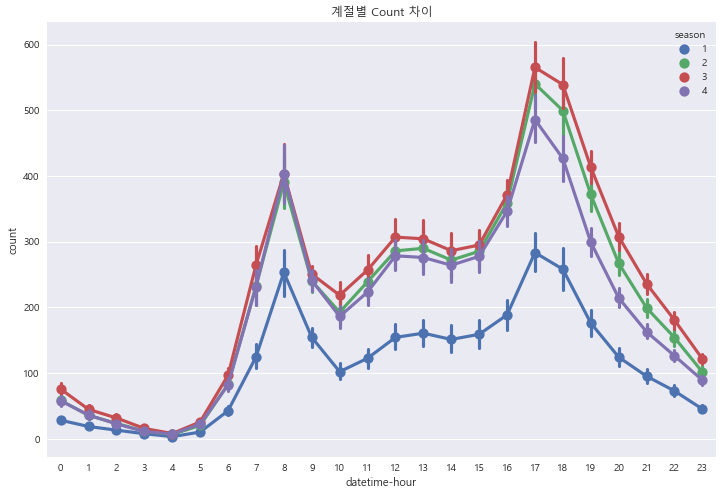

In [35]:
get_pointplot('datetime-hour', 'count', df, '계절별 Count 차이', hue='season')

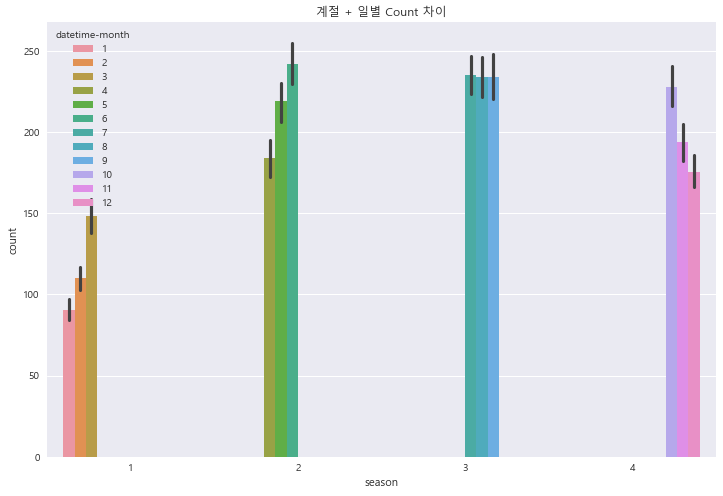

In [36]:
get_barplot('season', 'count', df, '계절 + 일별 Count 차이', hue='datetime-month')

season 컬럼은 **count에 영향을 주는 유의미한 칼럼이다.**

계절의 경우 1,2,3월을 봄으로, 4,5,6월을 여름으로, 7,8,9월을 가을으로 10,11,12월을 겨울로 네이밍을 했는데 네이밍에 문제가 있다고 생각되며
날씨를 조금 더 세분화할 수도 있다고 생각된다.

따라서 기온과의 연관성을 통해서 계절을 조금 더 세분화 하는 쪽으로 새로운 칼럼을 만드는 것도 좋을 것 같다.

### segment_season : 계절을 조금 더 세분화한 칼럼

1. season, datetime-month, temp, atemp 칼럼과의 연관성을 본다
2. 분석 결과를 바탕으로 season 칼럼을 세분화한다.

In [37]:
df.groupby('datetime-month').mean()[['temp', 'atemp']]

temp      atemp
datetime-month                      
1                9.840000  12.077579
2               11.798535  14.532608
3               15.902175  19.017220
4               18.718372  22.305891
5               22.674079  26.632374
6               27.064496  30.988750
7               30.841711  34.900395
8               29.736689  33.122001
9               25.779032  29.590248
10              20.933853  24.739682
11              15.185752  18.326054
12              13.831206  17.117220

In [38]:
df.groupby('season').mean()[['temp', 'atemp']]

temp      atemp
season                      
1       12.530491  15.228956
2       22.823483  26.647098
3       28.789111  32.540783
4       16.649239  20.059909

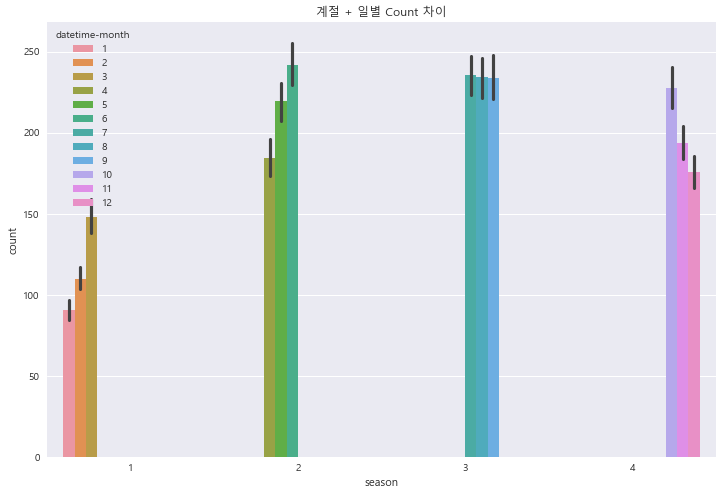

In [39]:
get_barplot('season', 'count', df, '계절 + 일별 Count 차이', hue='datetime-month')

season 칼럼의 경우 3은 비교적 분류가 잘 되었지만 나머지는 제대로 분류가 되지 않았다.

따라서 온도와 시각화의 결과에 따라 연관성이 높은 월을 서로 결합해 season 칼럼을 새롭게 세분화했다.

- 1,2 - 겨울 : 1 (가장 대여량이 적은 시기)

- 3,4 - 봄 : 2

- 5 - 초여름 : 3

- 6,7,8,9,10 - 여름 + 가을 : 4 (가장 대여량이 많은 시기)

- 11,12 - 초겨울 : 5

In [40]:
# segment_season 칼럼 생성 함수
def get_segment_season(x):
    if x in [0, 1]: return 1
    elif x in [3, 4]: return 2
    elif x in [5]: return 3
    elif x in [6,7,8,9,10]: return 4
    else: return 5

In [41]:
df['segment_season'] = df['datetime-month'].map(get_segment_season)

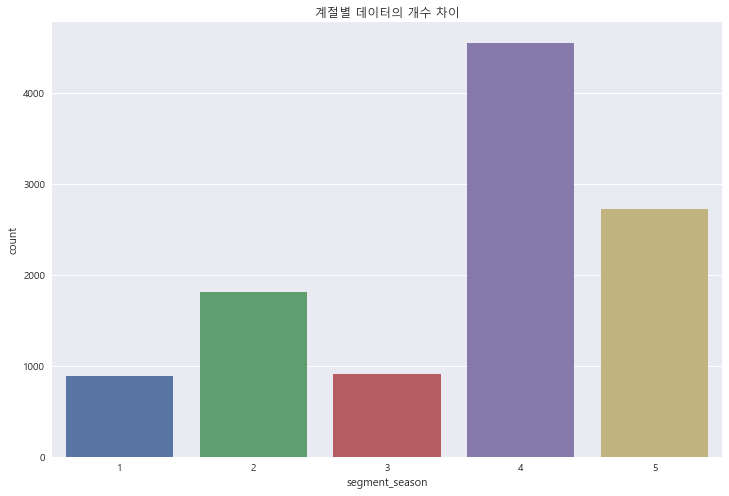

In [42]:
get_countplot('segment_season', df, '계절별 데이터의 개수 차이')

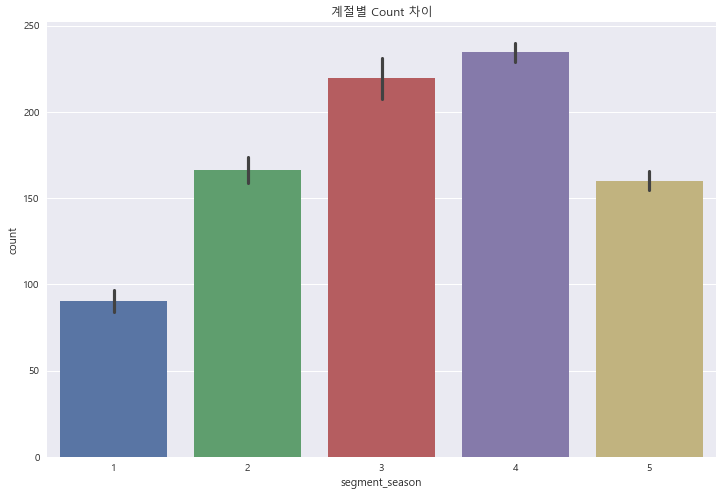

In [43]:
get_barplot('segment_season', 'count', df, '계절별 Count 차이')

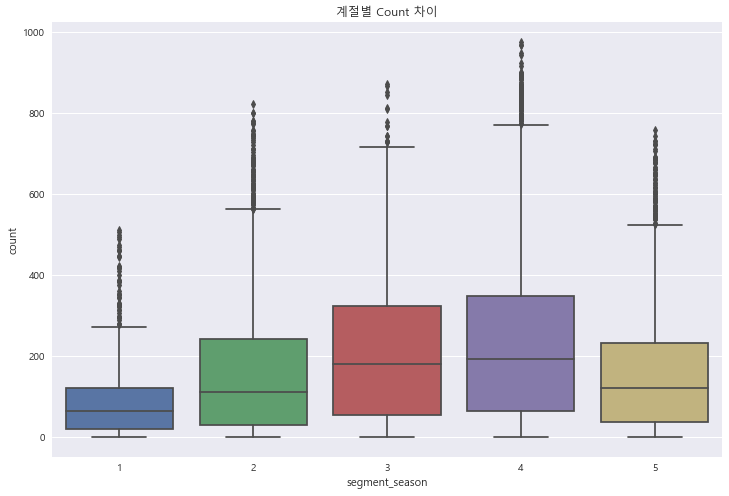

In [44]:
get_boxplot('segment_season', 'count', df, '계절별 Count 차이')

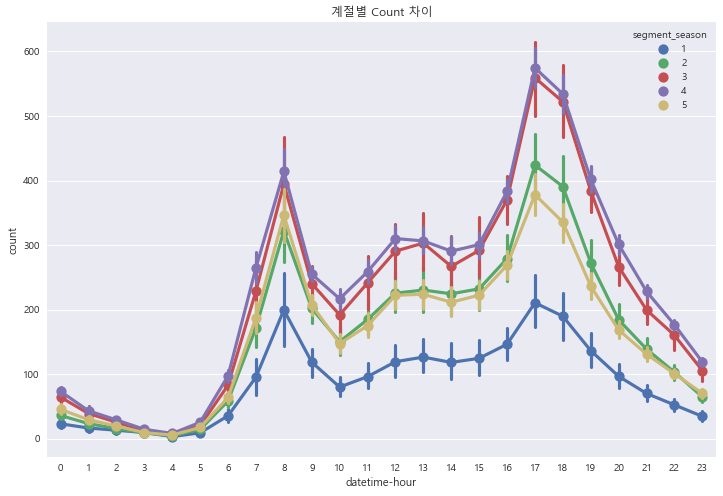

In [45]:
get_pointplot('datetime-hour', 'count', df, '계절별 Count 차이', hue='segment_season')

분석 결과 season보다 조금더 세말하게 대여량이 나누어졌다는 것을 확인할 수 있다.

또한 상대적으로 5월을 의미하는 초여름 3과 6,7,8,9,10월을 의미하는 여름과 가을을 합친 4 시기에는 다른 날들에 비해서 대여량이 많다는 것을 발견했다. 이는 날씨와 온도는 대여량이 큰 영향을 준다는 것이다.

따라서 segment_season 컬럼의 경우 season보다 더 세밀하게 대여량을 구분하므로 **유의미한 차이를 가져다 주는 컬럼이다.**


## holiday: 공휴일
 - 1 = 공휴일O
 - 0 = 공휴일X

In [46]:
a = df[df['holiday'] == 1]['datetime-dayofweek'].unique()
print(f'공휴일 1에 존재하는 요일: {a}')
a = df[df['holiday'] == 0]['datetime-dayofweek'].unique()
print(f'공휴일 0에 존재하는 요일: {a}')

공휴일 1에 존재하는 요일: [0 4 2]
공휴일 0에 존재하는 요일: [5 6 0 1 2 3 4]


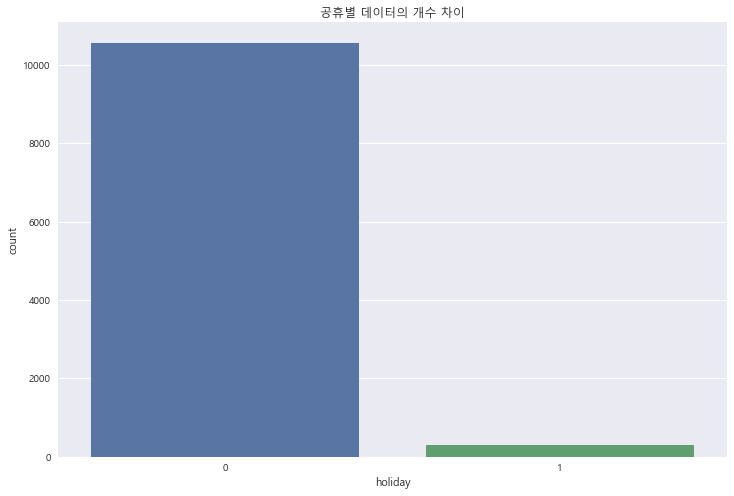

In [47]:
get_countplot('holiday', df, '공휴별 데이터의 개수 차이')

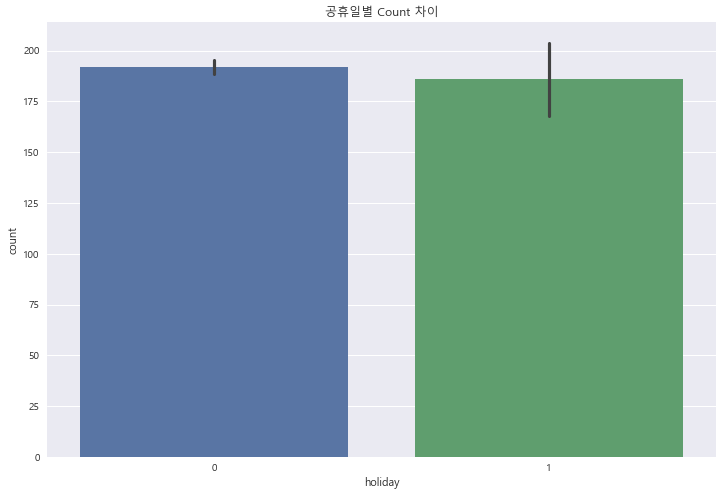

In [48]:
get_barplot('holiday', 'count', df, '공휴일별 Count 차이')

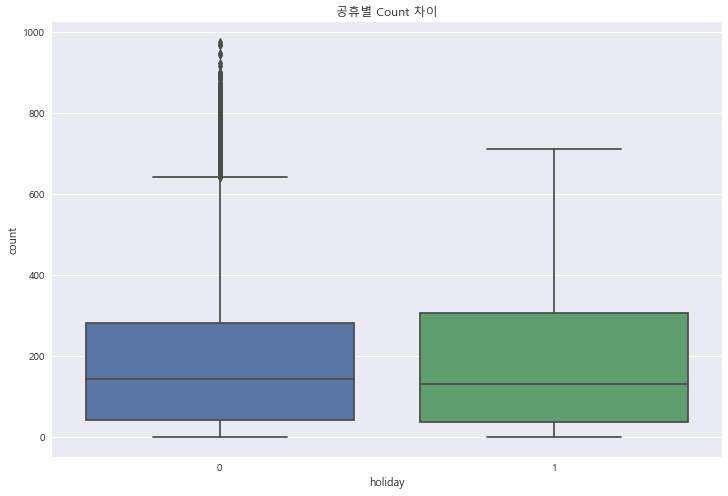

In [49]:
get_boxplot('holiday', 'count', df, '공휴별 Count 차이')

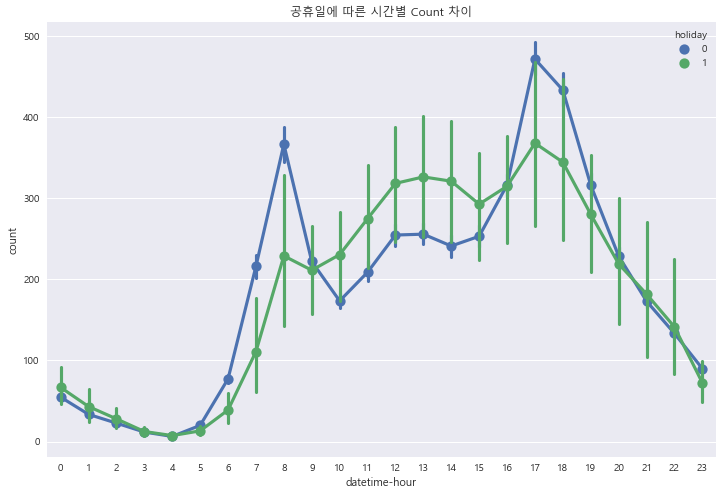

In [50]:
get_pointplot('datetime-hour', 'count', df, '공휴일에 따른 시간별 Count 차이', hue='holiday')

holiday 와 workingday는 서로 연관성이 매우 높은 칼럼이기 때문에 함께 분석 결과를 이야기할 예정이다.

## workingday: 근무일
 - 1 = 근무일O
 - 0 = 근무일X => (공휴일 + 주말)

In [51]:
a = df[df['workingday'] == 1]['datetime-dayofweek'].unique()
print(f'근무일 1에 존재하는 요일: {a}')
a = df[df['workingday'] == 0]['datetime-dayofweek'].unique()
print(f'근무일 0에 존재하는 요일: {a}')

근무일 1에 존재하는 요일: [0 1 2 3 4]
근무일 0에 존재하는 요일: [5 6 0 4 2]


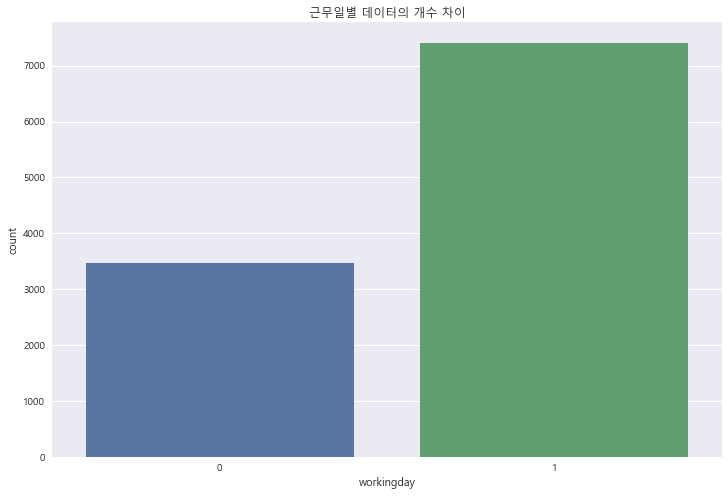

In [52]:
get_countplot('workingday', df, '근무일별 데이터의 개수 차이')

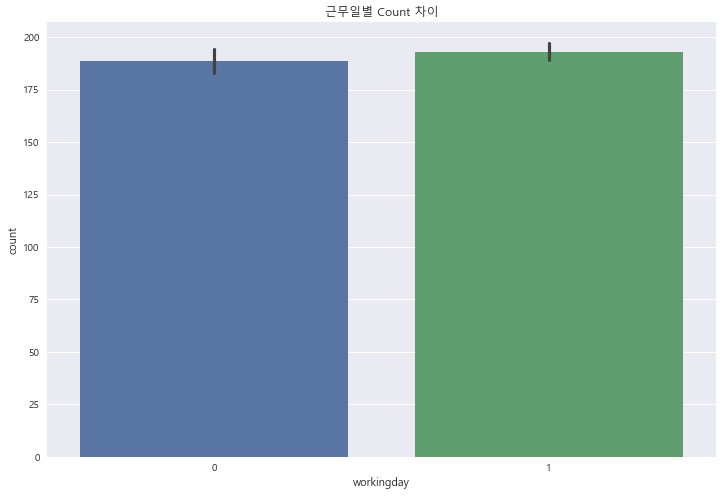

In [53]:
get_barplot('workingday', 'count', df, '근무일별 Count 차이')

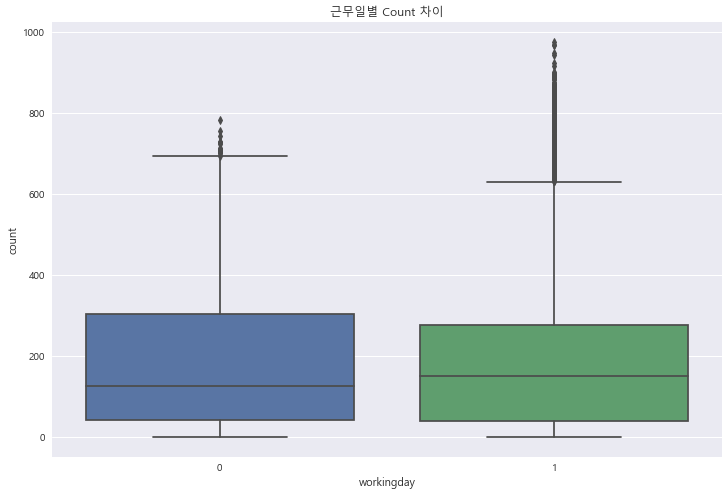

In [54]:
get_boxplot('workingday', 'count', df, '근무일별 Count 차이')

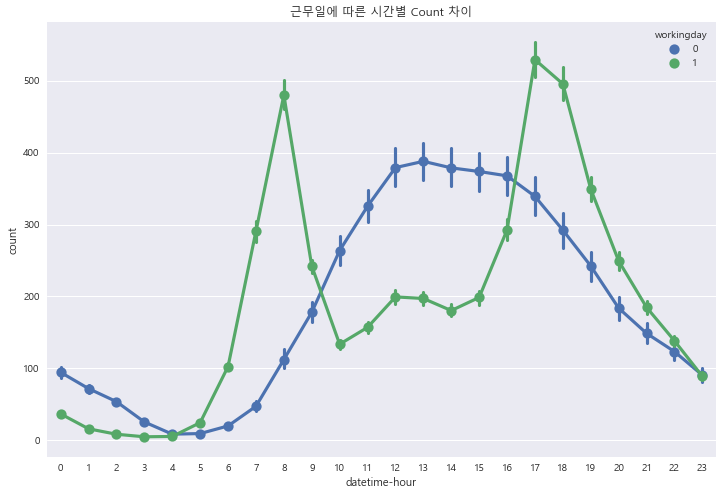

In [55]:
get_pointplot('datetime-hour', 'count', df, '근무일에 따른 시간별 Count 차이', hue='workingday')

공휴일은 주말을 제외한 평일 중에 휴일을 뜻하고 근무일은 공휴일과 주말을 제외한 근무일을 뜻한다.

분석 결과 확실히 근무를 하는 날에는 출퇴근 시간대에 대여량이 많으며 쉬는 날에는 점시시간대에 대여량의 비중이 높다는 것을 발견했다.

또한 현재 주말이라는 칼럼이 따로 존재하지 않는다는 것을 알 수 있으므로 주말 칼럼을 새롭게 만들었다.

하지만 근무일 안에 이미 주말 + 공휴일이라는 변수가 들어있기 때문에 workingday만을 예측에 활용하는 것이 좋다고 판단되며 workingday는 **유의미한 차이를 가져다주는 칼럼이다.**

## weather: 날씨
 - 1 = Clear, Few clouds, Partly cloudy, Partly cloudy (아주 좋은 날씨)
 - 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (좋은 날씨)
 - 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (좋지 않은 날씨)
 - 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (아주 좋지 않은 날씨)

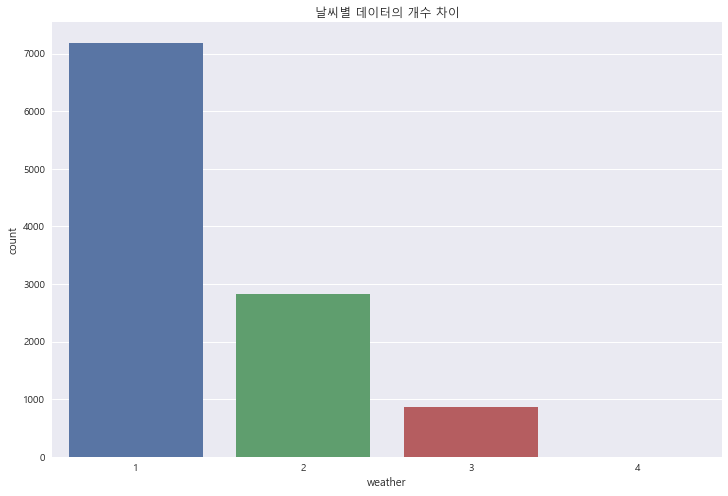

In [56]:
get_countplot('weather', df, '날씨별 데이터의 개수 차이')

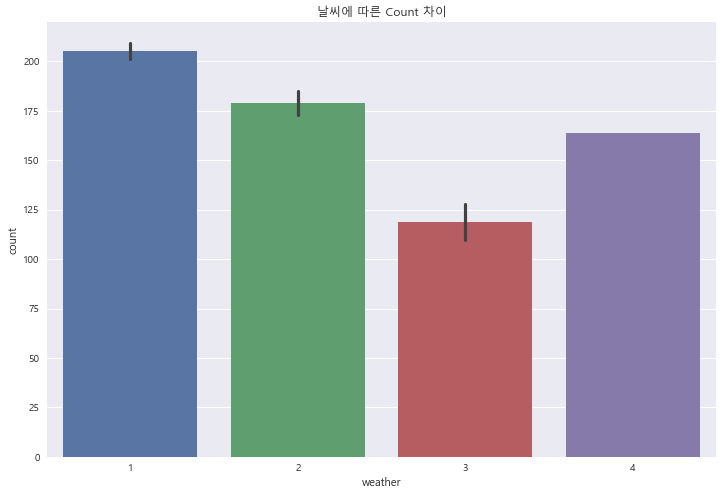

In [57]:
get_barplot('weather', 'count', df, '날씨에 따른 Count 차이')

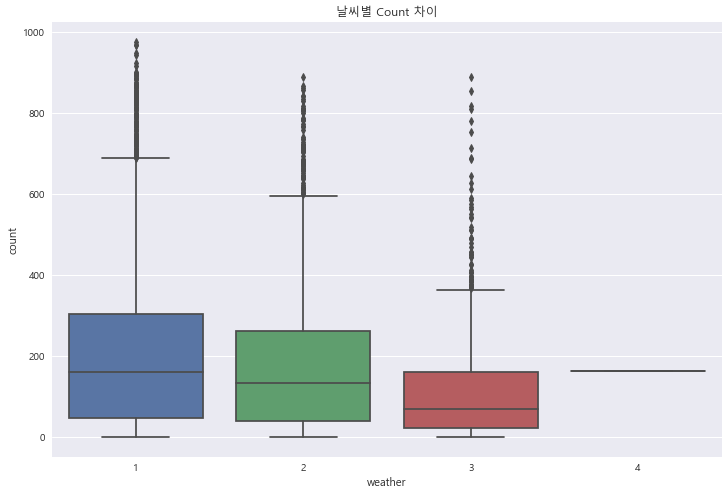

In [58]:
get_boxplot('weather', 'count', df, '날씨별 Count 차이')

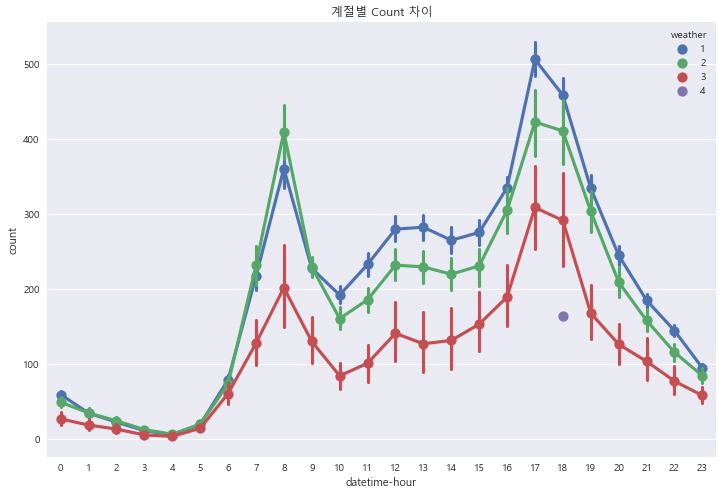

In [59]:
get_pointplot('datetime-hour', 'count', df, '계절별 Count 차이', hue='weather')

In [60]:
# 4라는 값이 1개가 존재하지만 이 값 자체가 다른 값의 예측에 큰 영향을 줄 수 있기 때문에
# 하루의 전체적인 날씨의 평균을 구하는 것이 좋다고 생각된다.
df[df['weather'] == 4]

datetime  season  holiday  workingday  weather  temp   atemp  \
5631 2012-01-09 18:00:00       1        0           1        4   8.2  11.365   

      humidity  windspeed  casual  registered  count  datetime-year  \
5631        86     6.0032       6         158    164           2012   

      datetime-month  datetime-day  datetime-hour  datetime-dayofweek  \
5631               1             9             18                   0   

     datetime-year-month  weekend  segment_season  
5631              2012-1        0               1

In [61]:
df[(df['datetime-year'] == 2012) & (df['datetime-month'] == 1) & (df['datetime-day'] == 9)]

datetime  season  holiday  workingday  weather   temp   atemp  \
5613 2012-01-09 00:00:00       1        0           1        1   9.84  11.365   
5614 2012-01-09 01:00:00       1        0           1        1   9.84  12.120   
5615 2012-01-09 02:00:00       1        0           1        1   9.84  12.120   
5616 2012-01-09 03:00:00       1        0           1        1   9.84  12.120   
5617 2012-01-09 04:00:00       1        0           1        1   9.02  12.120   
5618 2012-01-09 05:00:00       1        0           1        2   8.20  11.365   
5619 2012-01-09 06:00:00       1        0           1        2   9.02  11.365   
5620 2012-01-09 07:00:00       1        0           1        2   9.02  12.120   
5621 2012-01-09 08:00:00       1        0           1        2   9.02  12.880   
5622 2012-01-09 09:00:00       1        0           1        2   9.02  13.635   
5623 2012-01-09 10:00:00       1        0           1        1   9.84  14.395   
5624 2012-01-09 11:00:00       1        0           1        2  10.66  14.395   
5625 2012-01-09 12:00:00       1        0           1        2  10.66  13.635   
5626 2012-01-09 13:00:00       1        0           1        2  10.66  13.635   
5627 2012-01-09 14:00:00       1        0           1        3   9.02  11.365   
5628 2012-01-09 15:00:00       1        0           1        3   9.02  11.365   
5629 2012-01-09 16:00:00       1        0           1        3   9.02  12.880   
5630 2012-01-09 17:00:00       1        0           1        3   9.02  13.635   
5631 2012-01-09 18:00:00       1        0           1        4   8.20  11.365   
5632 2012-01-09 19:00:00       1        0           1        3   8.20  11.365   
5633 2012-01-09 20:00:00       1        0           1        2   8.20  11.365   
5634 2012-01-09 21:00:00       1        0           1        2   8.20  12.880   
5635 2012-01-09 22:00:00       1        0           1        2   8.20  11.365   
5636 2012-01-09 23:00:00       1        0           1        2   9.02  12.120   

      humidity  windspeed  casual  registered  count  datetime-year  \
5613        60    15.0013       3          12     15           2012   
5614        60     8.9981       1           4      5           2012   
5615        56     8.9981       2           3      5           2012   
5616        52    11.0014       0           3      3           2012   
5617        64     7.0015       0           4      4           2012   
5618        64     6.0032       0          21     21           2012   
5619        60     8.9981       3          85     88           2012   
5620        60     7.0015       1         239    240           2012   
5621        55     6.0032      13         407    420           2012   
5622        64     0.0000       9         188    197           2012   
5623        60     0.0000      13          95    108           2012   
5624        56     6.0032       6          82     88           2012   
5625        56     7.0015      10          93    103           2012   
5626        56     7.0015       3          77     80           2012   
5627        75    11.0014       5          45     50           2012   
5628        75    11.0014       5          64     69           2012   
5629        87     6.0032       3          46     49           2012   
5630        87     0.0000       5         147    152           2012   
5631        86     6.0032       6         158    164           2012   
5632        93     6.0032       3         187    190           2012   
5633        86     6.0032       5         127    132           2012   
5634        93     0.0000       1          78     79           2012   
5635        92     7.0015       8          54     62           2012   
5636        87     7.0015       1          51     52           2012   

      datetime-month  datetime-day  datetime-hour  datetime-dayofweek  \
5613               1             9              0                   0   
5614               1             9              1                   

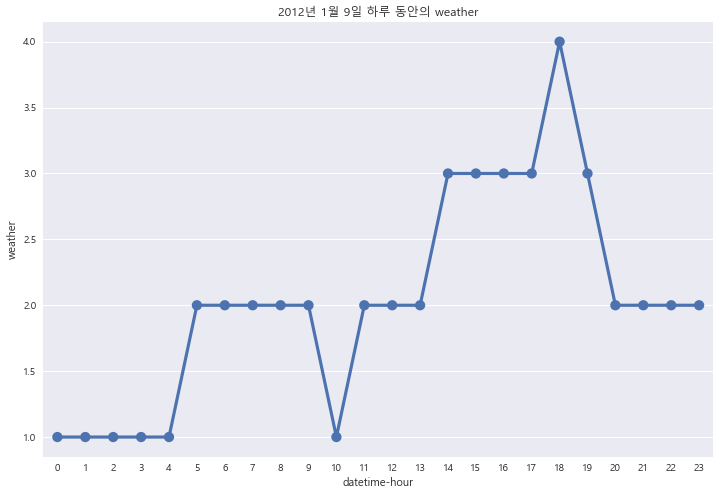

In [62]:
get_pointplot('datetime-hour', 'weather', df[(df['datetime-year'] == 2012) & (df['datetime-month'] == 1) & (df['datetime-day'] == 9)], '2012년 1월 9일 하루 동안의 weather')

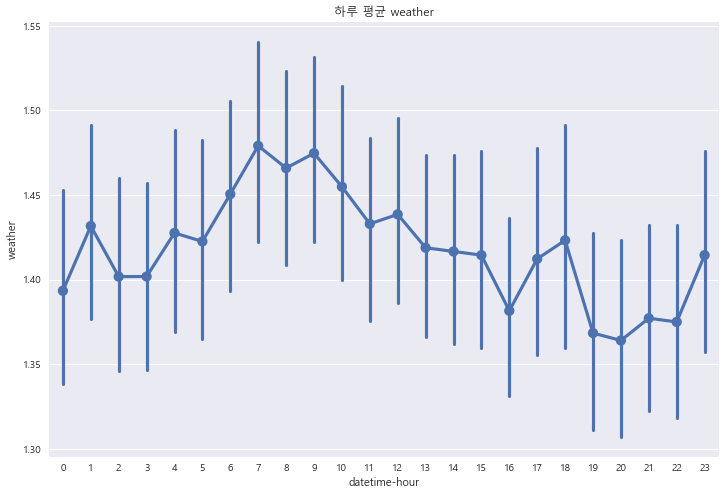

In [63]:
get_pointplot('datetime-hour', 'weather', df, '하루 평균 weather')

날씨 칼럼의 경우 대여량에 **유의미한 차이를 가져다주는 칼럼이다.**

하지만 날씨 칼럼의 단점은 1시간 단위로 날씨를 측정했기 때문에 그 날의 전체적인 날씨를 의미할 수 없다는 것이다. (df[df['weather'] == 4]를 분석한 부분을 보면 알 수 있다)

따라서 하루의 전체적인 날씨가 대여량에 더욱더 큰 영향을 준다고 생각하여 하루 동안의 기록된 날씨의 중앙값을 구해서 하루의 평균 날씨를 나타내는 칼럼을 만들 예정이다.

또한 가장 핫한 시간대 즉 대여량이 많은 시간대의 평균 날씨도 대여량에 영향을 준다고 생각해여 7시 ~ 20시 까지의 평균 날씨를 나태는 칼럼도 만들 예정이다.

### weather_median : 하루의 전체적인 날씨를 숫자로 나타내는 칼럼

In [64]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 하루 weather의 중앙값을 구하는 함수
weather_median_index_list = df.groupby('datetime-year-month-day').median()['weather'].index.tolist()
weather_median_value_list = df.groupby('datetime-year-month-day').median()['weather'].values.tolist()
def get_weather_median(x):
    find_weather_median_index = weather_median_index_list.index(x)
    find_weather_median_value = weather_median_value_list[find_weather_median_index]
    
    return find_weather_median_value

In [65]:
df['weather_median'] = df['datetime-year-month-day'].map(get_weather_median)

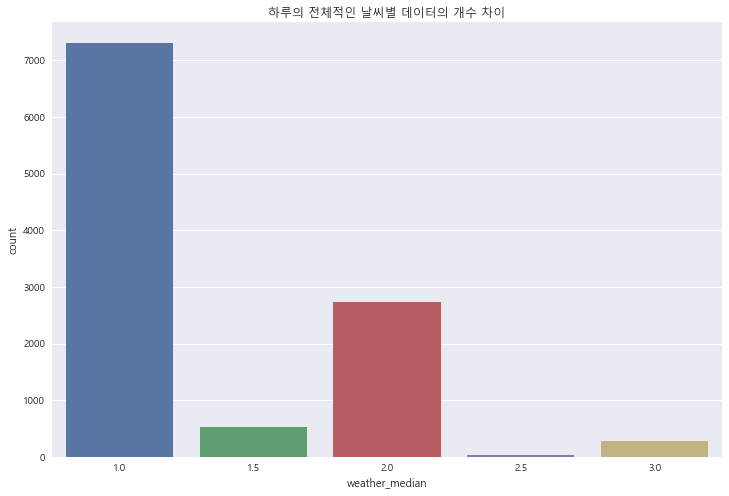

In [66]:
get_countplot('weather_median', df, '하루의 전체적인 날씨별 데이터의 개수 차이')

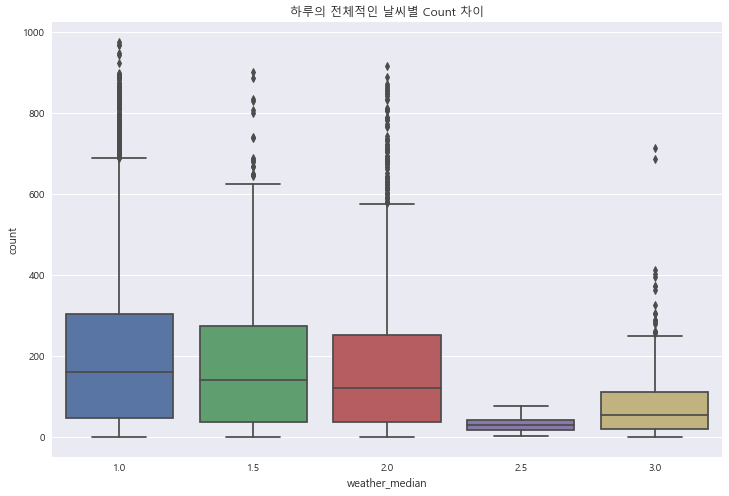

In [67]:
get_boxplot('weather_median', 'count', df, '하루의 전체적인 날씨별 Count 차이')

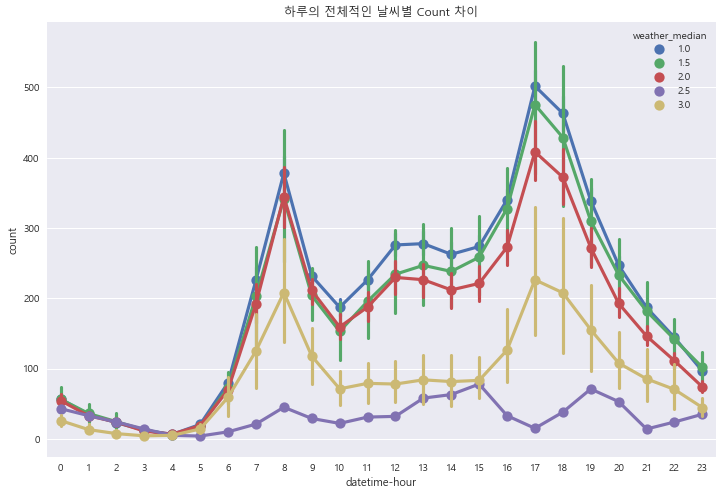

In [68]:
get_pointplot('datetime-hour', 'count', df, '하루의 전체적인 날씨별 Count 차이', hue='weather_median')

어느 정도 하루의 전체적인 날씨에 대한 대여량의 변화를 잘 표현하지만 2.5와 3.0의 경우 데이터 수가 적기 때문에 과적합의 오류가 발생할수도 있다고 판단된다.

따라서 1.0, 1.5 2.0 를 묶고 2.5, 3.0을 묶어서 하루의 전체적인 날씨의 긍정 부정을 의미하는 칼럼을 새롭게 만들었다.

### weather_median_state : 하루 날씨의 전체적인 상태를 긍정과 부정으로 구분하는 컬럼
- 1 : 긍정적인 날씨
- 0 : 부정적인 날씨

In [69]:
# 1 ~ 2 는 긍정적인 날씨 나머지는 부정적인 날씨
df['weather_median_state'] = df['weather_median'].map(lambda x : 0 if x >= 2.5 else 1)

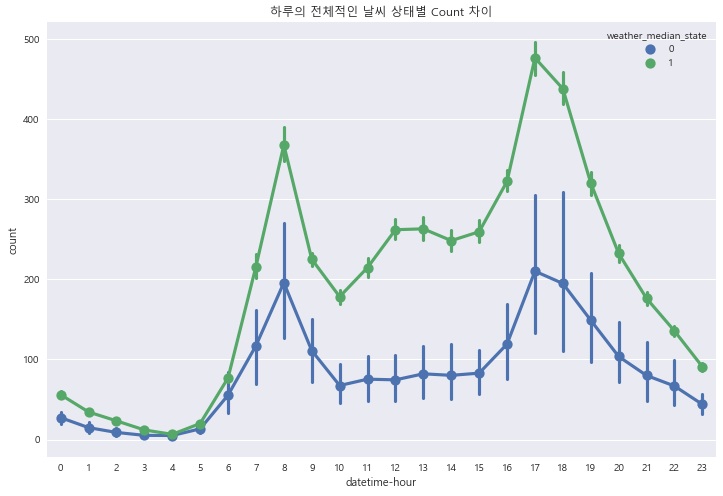

In [70]:
get_pointplot('datetime-hour', 'count', df, '하루의 전체적인 날씨 상태별 Count 차이', hue='weather_median_state')

weather_median 보다 조금 더 과적합을 개선하며 대여량을 잘 구분한다는 것을 확인할 수 있다.

### hot_weather_median : 가장 자전거 이용량이 많은 시간대(7시 ~ 20시 까지)에 전체적인 날씨를 숫자로 나타내는 칼럼

In [71]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 가장 자전거 이용량이 많은 시간대에 weather의 중앙값을 구하는 함수
hot_weather_median_index_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').median()['weather'].index.tolist()
hot_weather_median_value_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').median()['weather'].values.tolist()
def get_hot_weather_median(x):
    find_hot_weather_median_index = hot_weather_median_index_list.index(x)
    find_hot_weather_median_value = hot_weather_median_value_list[find_hot_weather_median_index]
    
    return find_hot_weather_median_value

In [72]:
df['hot_weather_median'] = df['datetime-year-month-day'].map(get_hot_weather_median)

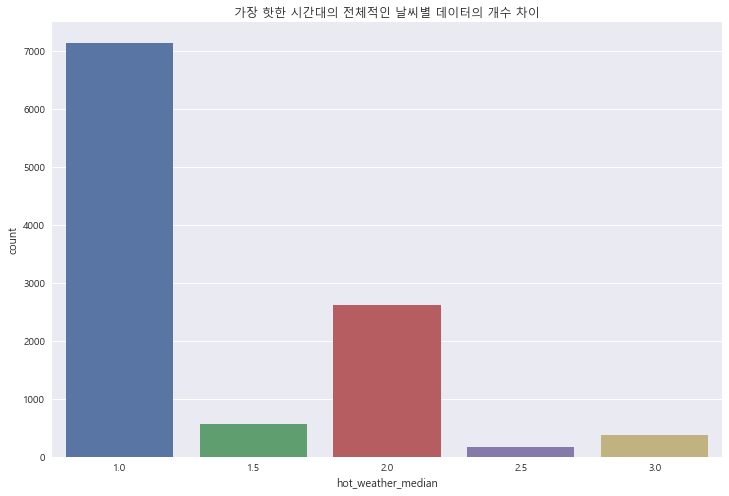

In [73]:
get_countplot('hot_weather_median', df, '가장 핫한 시간대의 전체적인 날씨별 데이터의 개수 차이')

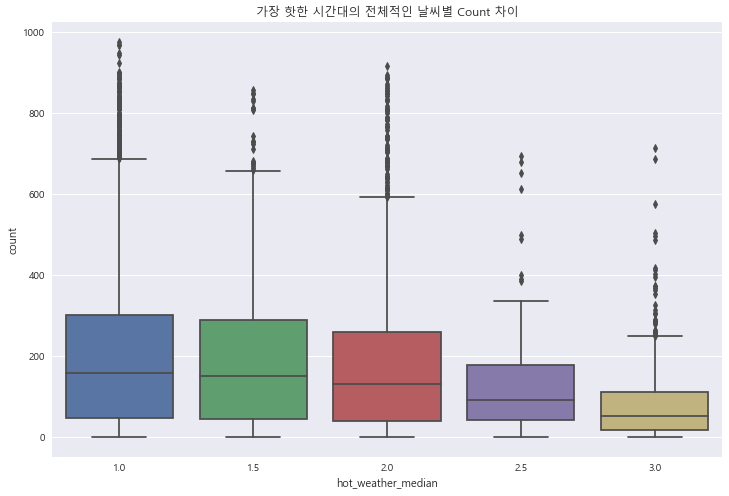

In [74]:
get_boxplot('hot_weather_median', 'count', df, '가장 핫한 시간대의 전체적인 날씨별 Count 차이')

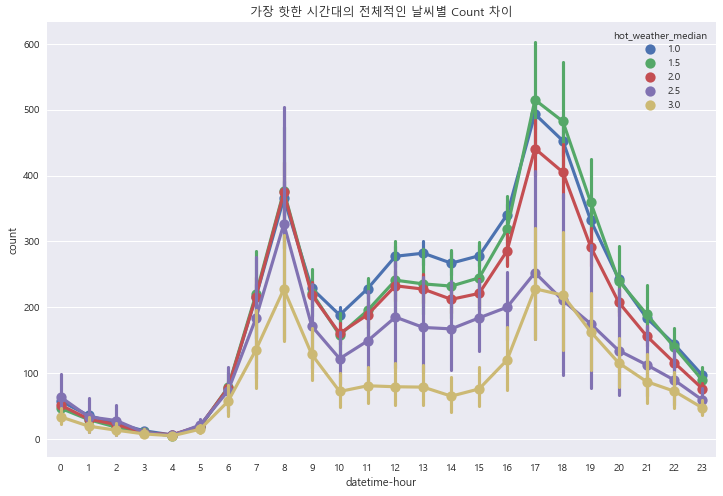

In [75]:
get_pointplot('datetime-hour', 'count', df, '가장 핫한 시간대의 전체적인 날씨별 Count 차이', hue='hot_weather_median')

### hot_weather_median_state : 가장 자전거 이용량이 많은 시간대(7시 ~ 20시 까지)에 날씨의 전체적인 상태를 긍정과 부정으로 구분하는 칼럼

In [76]:
# 1 ~ 2 는 긍정적인 날씨 나머지는 부정적인 날씨
df['hot_weather_median_state'] = df['hot_weather_median'].map(lambda x : 0 if x >= 2.5 else 1)

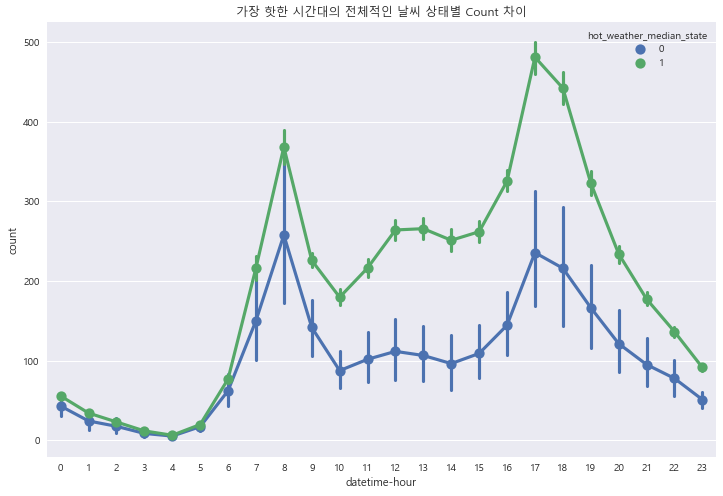

In [77]:
get_pointplot('datetime-hour', 'count', df, '가장 핫한 시간대의 전체적인 날씨 상태별 Count 차이', hue='hot_weather_median_state')

## 과제3 - 1. 수치형 변수간 상관관계 파악

수치형 변수를 시각화하기 전에 우선적으로 수치형 변수간에 상관관계를 파악함

In [78]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

num_cols_df_cor = df[num_cols].corr()

num_cols_df_cor.style.background_gradient(cmap='coolwarm').set_precision(3)

<AxesSubplot:>

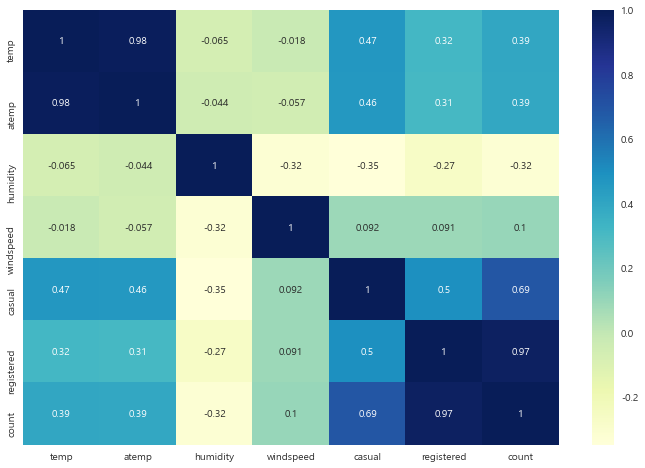

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(num_cols_df_cor,cmap='YlGnBu', annot=True)

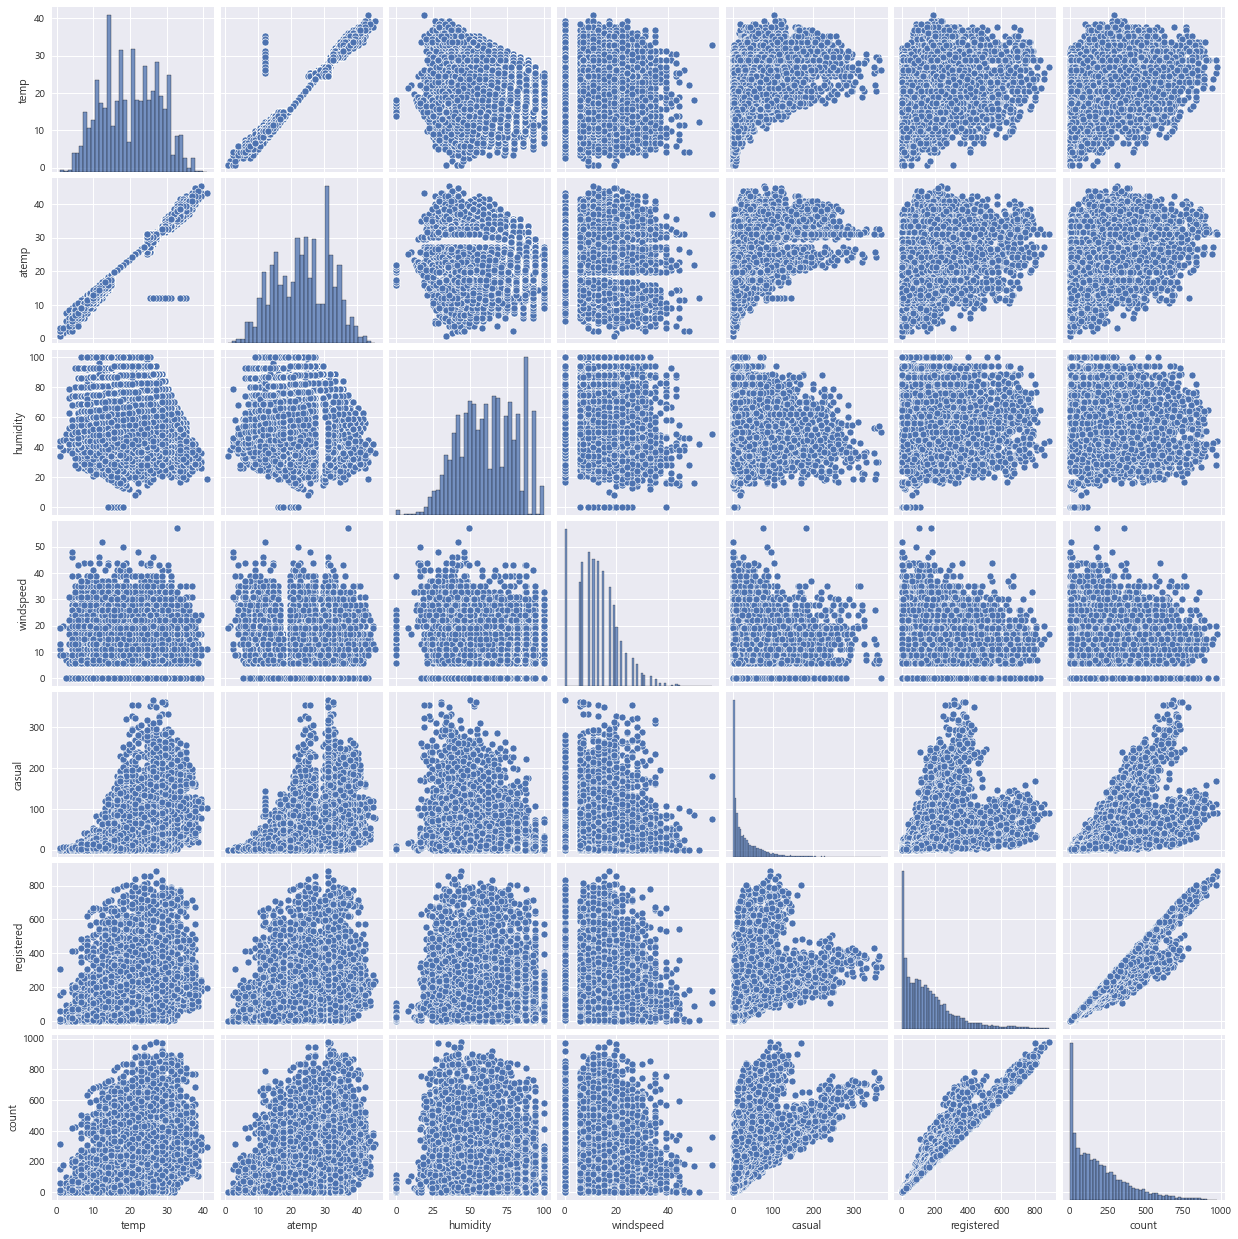

In [80]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

sns.pairplot(df[num_cols])

분석 결과 temp와 atemp와 연관성이 존재하고 humidity와 windspeed가 연관성이 존재한다고 볼 수 있다

atemp는 체감온도이기 때문에 당연히 섭씨 온도를 의미한 temp와 높은 상관성을 가진다.

humidity와 windspeed는 서로 왜 연관성이 높은지 조금 더 분석이 필요해 보인다.

count는 windspeed를 제외한 모든 변수와의 연관성이 존재하는데 humidity와 windspeed가 어느 정도 연관성이 존재하기 때문에 이를 이용해 새로운 칼럼을 만들 수 있을 것 같다.

casual과 registered는 각각 비회원과 회원의 대여량을 의미하며 둘을 합치면 count가 되기 때문에 당연히 높은 상관성을 가진다고 할 수 있다.

## temp: 섭씨 온도

In [81]:
cols = ['temp', 'atemp', 'count']
df.groupby('weather').mean()[cols]

temp      atemp       count
weather                                  
1        20.557122  23.994126  205.236791
2        19.614608  23.072414  178.955540
3        19.546356  22.753091  118.846333
4         8.200000  11.365000  164.000000

In [82]:
cols = ['temp', 'atemp', 'count']
df.groupby('datetime-month').mean()[cols]

temp      atemp       count
datetime-month                                  
1                9.840000  12.077579   90.366516
2               11.798535  14.532608  110.003330
3               15.902175  19.017220  148.169811
4               18.718372  22.305891  184.160616
5               22.674079  26.632374  219.459430
6               27.064496  30.988750  242.031798
7               30.841711  34.900395  235.325658
8               29.736689  33.122001  234.118421
9               25.779032  29.590248  233.805281
10              20.933853  24.739682  227.699232
11              15.185752  18.326054  193.677278
12              13.831206  17.117220  175.614035

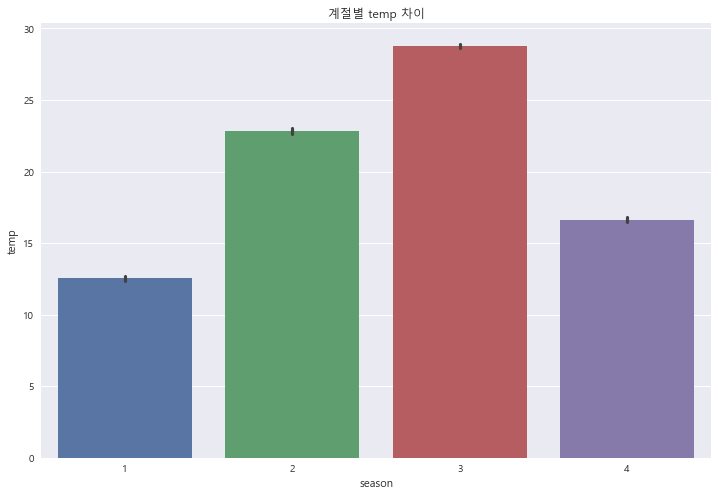

In [83]:
get_barplot('season', 'temp', df, '계절별 temp 차이')

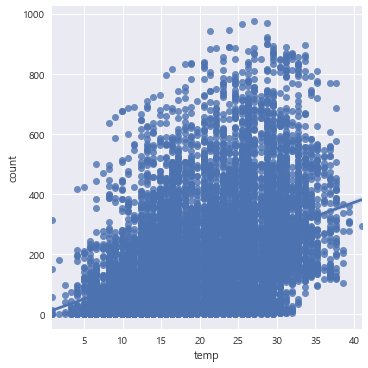

In [84]:
sns.lmplot(x='temp', y='count', data=df)

Text(0.5, 1.0, 'temp Log Transformation After')

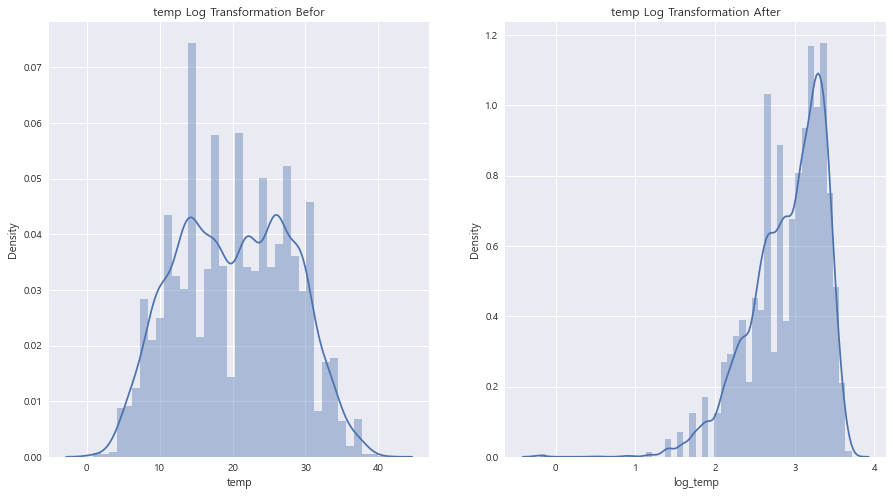

In [85]:
# 로그 변환
df['log_temp']= df['temp'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['temp'], ax = ax[0])
sns.distplot(df['log_temp'], ax = ax[1])
ax[0].set_title('temp Log Transformation Befor')
ax[1].set_title('temp Log Transformation After')

이미 계절을 세분화하는데 활용했고 temp는 로그 변환을 하지 않는 것이 좋은것으로 판단된다.

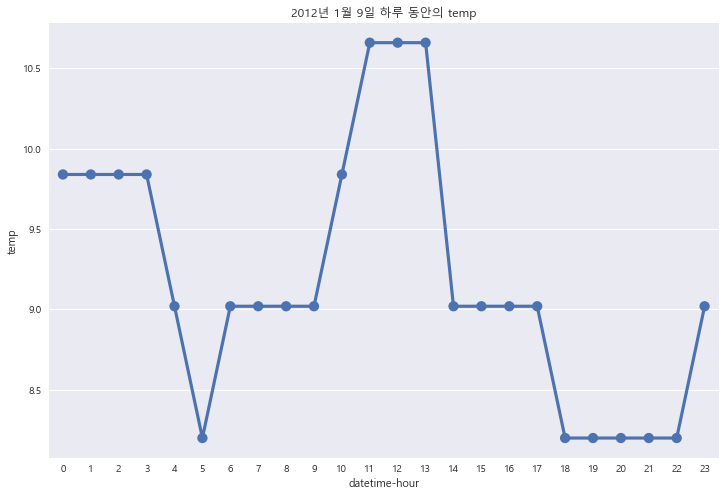

In [86]:
get_pointplot('datetime-hour', 'temp', df[(df['datetime-year'] == 2012) & (df['datetime-month'] == 1) & (df['datetime-day'] == 9)], '2012년 1월 9일 하루 동안의 temp')

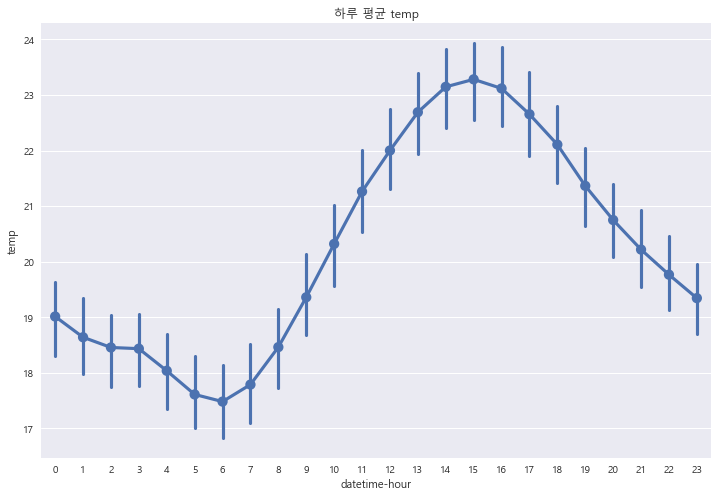

In [87]:
get_pointplot('datetime-hour', 'temp', df, '하루 평균 temp')

Text(0.5, 1.0, '히루 평균 temp')

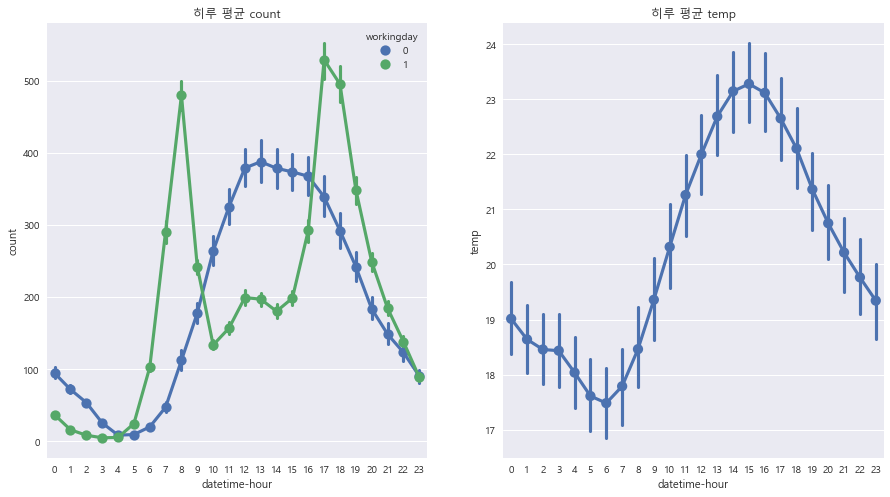

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.pointplot(x='datetime-hour', y='count', data = df, ax = ax[0], hue='workingday')
sns.pointplot(x='datetime-hour', y='temp', data = df, ax = ax[1])
ax[0].set_title('히루 평균 count')
ax[1].set_title('히루 평균 temp')

공휴일의 경우 count의 추세와 temp와 비슷한 형태를 보이는데 이는 온도가 따뜻한 시간대가 당연히 활동하게 좋다는 것을 의미한다.  
(두개를 이어붙이면 시각화가 더 좋겠지만 seaborn은 찾지를 못했습니다. 죄송합니다.)

온도 또한 1시간 단위로 측정되어서 하루의 전체적인 온도를 나타낼 수 없다고 생각하여

하루의 전체적인 평균 온도를 나타내는 칼럼과 가장 핫한 시간대의 평균 온도를 나타내는 칼럼을 새롭게 만들 예정이다.

### temp_mean : 하루의 평균 온도를 나타내는 칼럼

In [88]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 하루 temp의 평균을 구하는 함수
temp_mean_index_list = df.groupby('datetime-year-month-day').mean()['temp'].index.tolist()
temp_mean_value_list = df.groupby('datetime-year-month-day').mean()['temp'].values.tolist()
def get_temp_mean(x):
    find_temp_mean_index = temp_mean_index_list.index(x)
    find_temp_mean_value = temp_mean_value_list[find_temp_mean_index]
    
    return find_temp_mean_value

In [89]:
df['temp_mean'] = df['datetime-year-month-day'].map(get_temp_mean)

Text(0.5, 1.0, 'temp_mean Log Transformation After')

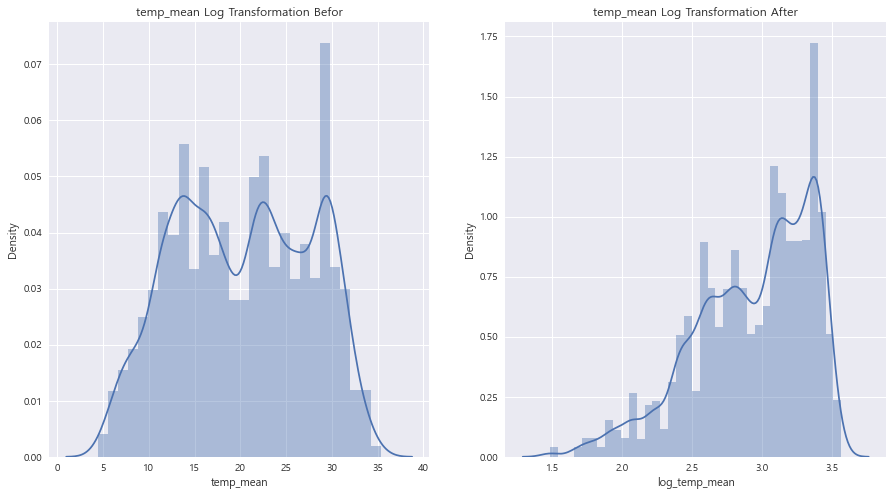

In [90]:
# 로그 변환
df['log_temp_mean']= df['temp_mean'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['temp_mean'], ax = ax[0])
sns.distplot(df['log_temp_mean'], ax = ax[1])
ax[0].set_title('temp_mean Log Transformation Befor')
ax[1].set_title('temp_mean Log Transformation After')

### hot_temp_mean : 가장 핫한 시간대의 평균 온도를 나타내는 칼럼

In [91]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 가장 자전거 이용량이 많은 시간대에 temp의 평균을 구하는 함수
hot_temp_mean_index_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').mean()['temp'].index.tolist()
hot_temp_mean_value_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').mean()['temp'].values.tolist()
def get_hot_temp_mean(x):
    find_hot_temp_mean_index = hot_temp_mean_index_list.index(x)
    find_hot_temp_mean_value = hot_temp_mean_value_list[find_hot_temp_mean_index]
    
    return find_hot_temp_mean_value

In [92]:
df['hot_temp_mean'] = df['datetime-year-month-day'].map(get_hot_temp_mean)

Text(0.5, 1.0, 'hot_temp_mean Log Transformation After')

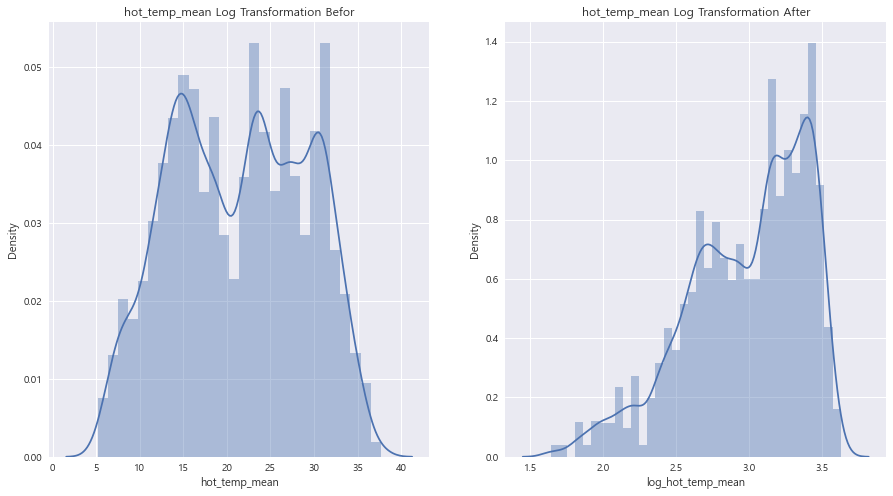

In [93]:
# 로그 변환
df['log_hot_temp_mean']= df['hot_temp_mean'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['hot_temp_mean'], ax = ax[0])
sns.distplot(df['log_hot_temp_mean'], ax = ax[1])
ax[0].set_title('hot_temp_mean Log Transformation Befor')
ax[1].set_title('hot_temp_mean Log Transformation After')

## atemp: 체감 온도

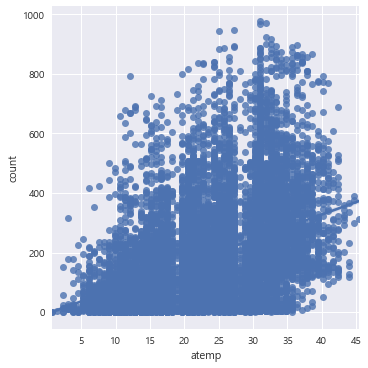

In [94]:
sns.lmplot(x='atemp', y='count', data=df)

Text(0.5, 1.0, 'atemp Log Transformation After')

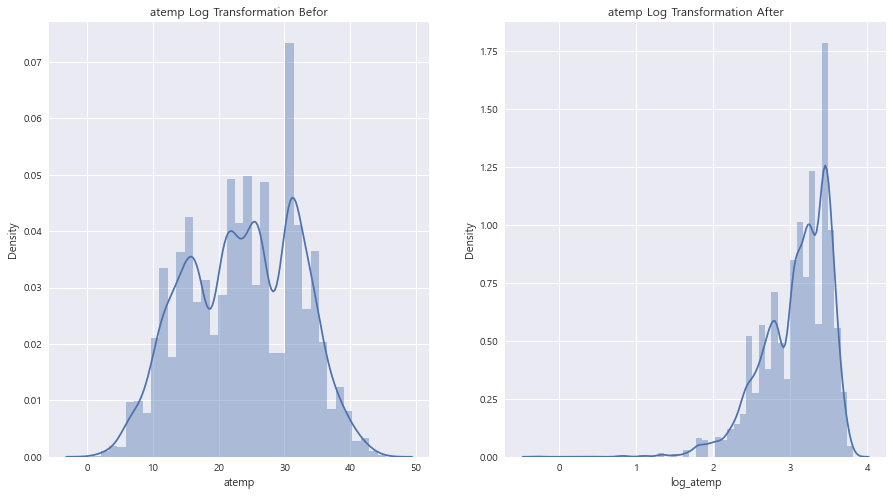

In [95]:
# 로그 변환
df['log_atemp']= df['atemp'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['atemp'], ax = ax[0])
sns.distplot(df['log_atemp'], ax = ax[1])
ax[0].set_title('atemp Log Transformation Befor')
ax[1].set_title('atemp Log Transformation After')

이미 계절을 세분화하는데 활용했고 atemp는 로그 변환을 하지 않는 것이 좋은 것으로 판단된다.

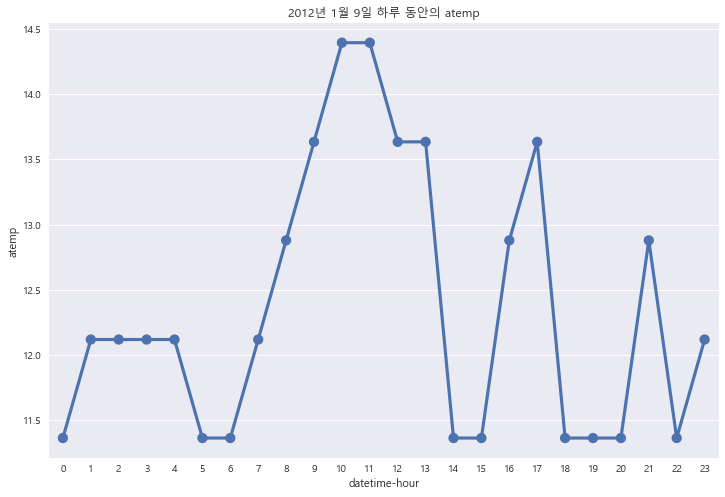

In [96]:
get_pointplot('datetime-hour', 'atemp', df[(df['datetime-year'] == 2012) & (df['datetime-month'] == 1) & (df['datetime-day'] == 9)], '2012년 1월 9일 하루 동안의 atemp')

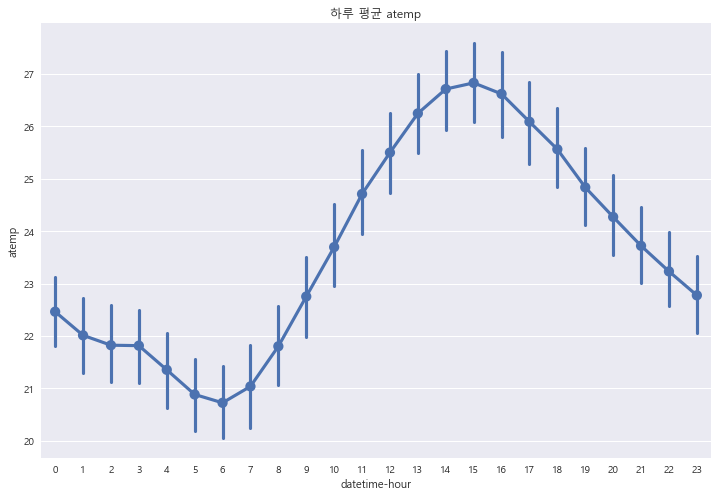

In [97]:
get_pointplot('datetime-hour', 'atemp', df, '하루 평균 atemp')

Text(0.5, 1.0, '히루 평균 atemp')

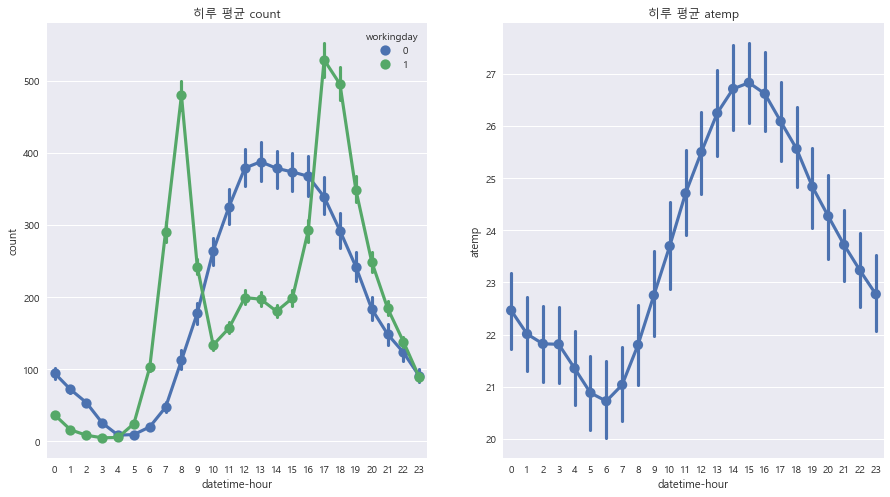

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.pointplot(x='datetime-hour', y='count', data = df, ax = ax[0], hue='workingday')
sns.pointplot(x='datetime-hour', y='atemp', data = df, ax = ax[1])
ax[0].set_title('히루 평균 count')
ax[1].set_title('히루 평균 atemp')

체감온도 또한 당연히 온도와 유사한 형태를 보인다.

체감 온도 또한 1시간 단위로 측정되어서 하루의 전체적인 체감 온도를 나타낼 수 없다고 생각하여

하루의 전체적인 평균 체감 온도를 나타내는 칼럼과 가장 핫한 시간대의 평균 체감 온도를 나타내는 칼럼을 새롭게 만들 예정이다.

### atemp_mean : 하루의 평균 체감 온도를 나타내는 칼럼

In [98]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 하루 atemp의 평균을 구하는 함수
atemp_mean_index_list = df.groupby('datetime-year-month-day').mean()['atemp'].index.tolist()
atemp_mean_value_list = df.groupby('datetime-year-month-day').mean()['atemp'].values.tolist()
def get_atemp_mean(x):
    find_atemp_mean_index = atemp_mean_index_list.index(x)
    find_atemp_mean_value = atemp_mean_value_list[find_atemp_mean_index]
    
    return find_atemp_mean_value

In [99]:
df['atemp_mean'] = df['datetime-year-month-day'].map(get_atemp_mean)

Text(0.5, 1.0, 'atemp_mean Log Transformation After')

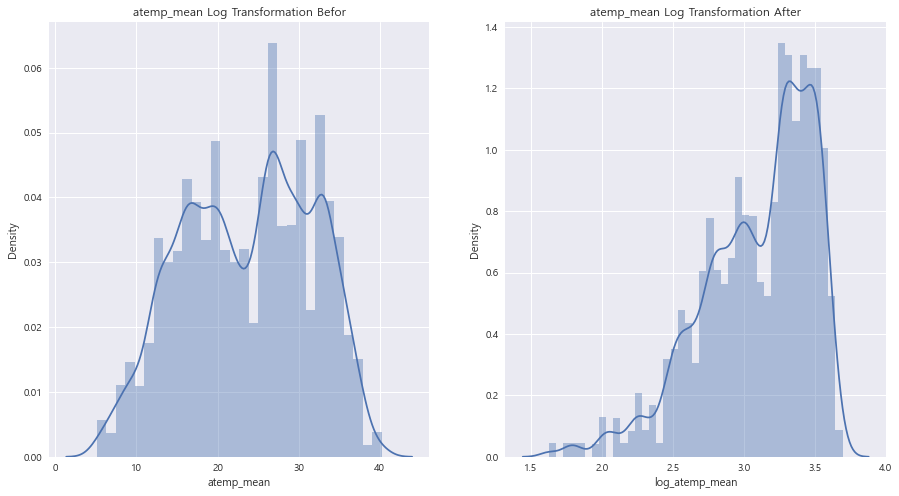

In [100]:
# 로그 변환
df['log_atemp_mean']= df['atemp_mean'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['atemp_mean'], ax = ax[0])
sns.distplot(df['log_atemp_mean'], ax = ax[1])
ax[0].set_title('atemp_mean Log Transformation Befor')
ax[1].set_title('atemp_mean Log Transformation After')

### hot_atemp_mean : 가장 핫한 시간대의 평균 체감 온도를 나타내는 칼럼

In [101]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 가장 자전거 이용량이 많은 시간대에 atemp의 평균을 구하는 함수
hot_atemp_mean_index_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').mean()['atemp'].index.tolist()
hot_atemp_mean_value_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').mean()['atemp'].values.tolist()
def get_hot_atemp_mean(x):
    find_hot_atemp_mean_index = hot_atemp_mean_index_list.index(x)
    find_hot_atemp_mean_value = hot_atemp_mean_value_list[find_hot_atemp_mean_index]
    
    return find_hot_atemp_mean_value

In [102]:
df['hot_atemp_mean'] = df['datetime-year-month-day'].map(get_hot_atemp_mean)

Text(0.5, 1.0, 'hot_atemp_mean Log Transformation After')

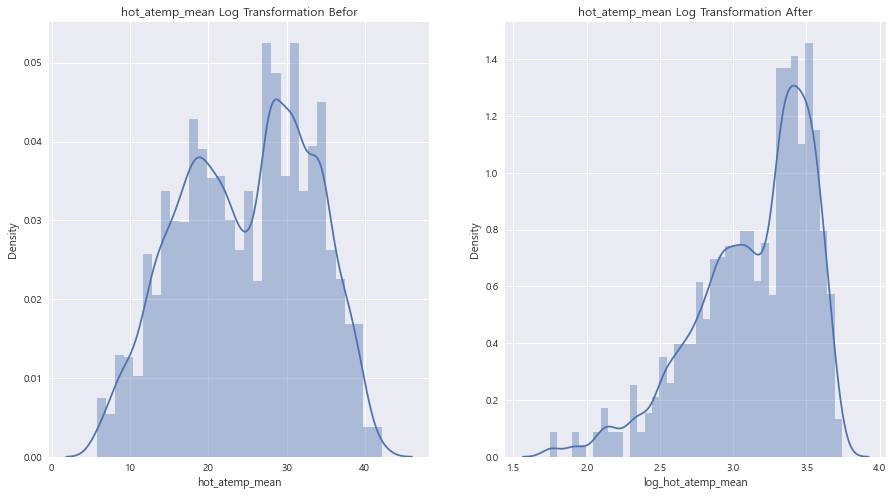

In [103]:
# 로그 변환
df['log_hot_atemp_mean']= df['hot_atemp_mean'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['hot_atemp_mean'], ax = ax[0])
sns.distplot(df['log_hot_atemp_mean'], ax = ax[1])
ax[0].set_title('hot_atemp_mean Log Transformation Befor')
ax[1].set_title('hot_atemp_mean Log Transformation After')

## humidity: 습도


In [104]:
### 3월 10일의 경우 습도기가 고장나서 측정이 제대로 안된 것 같다. 이 날을 3월 달의 평균 습도로 대체한다.
df[df['humidity'] == 0]

datetime  season  holiday  workingday  weather   temp   atemp  \
1091 2011-03-10 00:00:00       1        0           1        3  13.94  15.910   
1092 2011-03-10 01:00:00       1        0           1        3  13.94  15.910   
1093 2011-03-10 02:00:00       1        0           1        3  13.94  15.910   
1094 2011-03-10 05:00:00       1        0           1        3  14.76  17.425   
1095 2011-03-10 06:00:00       1        0           1        3  14.76  16.665   
1096 2011-03-10 07:00:00       1        0           1        3  15.58  19.695   
1097 2011-03-10 08:00:00       1        0           1        3  15.58  19.695   
1098 2011-03-10 09:00:00       1        0           1        3  16.40  20.455   
1099 2011-03-10 10:00:00       1        0           1        3  16.40  20.455   
1100 2011-03-10 11:00:00       1        0           1        3  16.40  20.455   
1101 2011-03-10 12:00:00       1        0           1        3  17.22  21.210   
1102 2011-03-10 13:00:00       1        0           1        3  17.22  21.210   
1103 2011-03-10 14:00:00       1        0           1        3  18.04  21.970   
1104 2011-03-10 15:00:00       1        0           1        3  18.04  21.970   
1105 2011-03-10 16:00:00       1        0           1        3  17.22  21.210   
1106 2011-03-10 17:00:00       1        0           1        2  18.04  21.970   
1107 2011-03-10 18:00:00       1        0           1        3  18.04  21.970   
1108 2011-03-10 19:00:00       1        0           1        3  18.04  21.970   
1109 2011-03-10 20:00:00       1        0           1        3  14.76  16.665   
1110 2011-03-10 21:00:00       1        0           1        3  14.76  17.425   
1111 2011-03-10 22:00:00       1        0           1        2  13.94  16.665   
1112 2011-03-10 23:00:00       1        0           1        3  13.94  17.425   

      humidity  windspeed  casual  ...  log_temp  temp_mean  log_temp_mean  \
1091         0    16.9979       3  ...  2.634762  15.952727        2.76963   
1092         0    16.9979       0  ...  2.634762  15.952727        2.76963   
1093         0    16.9979       0  ...  2.634762  15.952727        2.76963   
1094         0    12.9980       1  ...  2.691921  15.952727        2.76963   
1095         0    22.0028       0  ...  2.691921  15.952727        2.76963   
1096         0    15.0013       1  ...  2.745988  15.952727        2.76963   
1097         0    19.0012       1  ...  2.745988  15.952727        2.76963   
1098         0    15.0013       1  ...  2.797281  15.952727        2.76963   
1099         0    11.0014       0  ...  2.797281  15.952727        2.76963   
1100         0    16.9979       6  ...  2.797281  15.952727        2.76963   
1101         0    15.0013       4  ...  2.846071  15.952727        2.76963   
1102         0    15.0013       1  ...  2.846071  15.952727        2.76963   
1103         0    19.9995       0  ...  2.892592  15.952727        2.76963   
1104         0    15.0013       3  ...  2.892592  15.952727        2.76963   
1105         0    16.9979       1  ...  2.846071  15.952727        2.76963   
1106         0    26.0027       2  ...  2.892592  15.952727        2.76963   
1107         0    23.9994       2  ...  2.892592  15.952727        2.76963   
1108         0    39.0007       5  ...  2.892592  15.952727        2.76963   
1109         0    22.0028       9  ...  2.691921  15.952727        2.76963   
1110         0    15.0013       1  ...  2.691921  15.952727        2.76963   
1111         0     8.9981       4  ...  2.634762  15.952727        2.76963   
1112         0     6.0032       1  ...  2.634762  15.952727        2.76963   

      hot_temp_mean  log_hot_temp_mean  log_atemp  atemp_mean log_atemp_mean  \
1091      16.927143           2.828918   2.766948   19.283409       2.959245   
1092      16.927143           2.828918   2.766948   19.283409       2.959245   
1093      16.927143           2.828918   2.766948   19.283409       2.959245   
1094      16.927143           2.82891

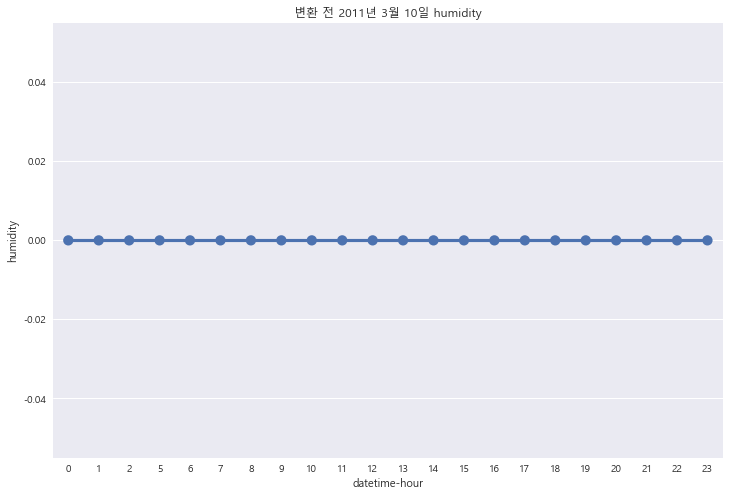

In [105]:
get_pointplot('datetime-hour', 'humidity', df[df['humidity'] == 0], '변환 전 2011년 3월 10일 humidity')

2011년 3월 10일의 경우 습도 측정 값이 0으로 나와있는데 이 날 습도기가 고장난것으로 판단되어 각 값을 3월의 각 시간별 습도 값으로 대체했다.

In [106]:
humidity_result = []
for h in range(24):
    humiditys = df[(df['datetime-month'] == 3) & (df['humidity'] != 0) & (df['datetime-hour'] == h)].mean()['humidity']
    df.loc[(df['humidity'] == 0) & (df['datetime-hour'] == h), 'humidity'] = humiditys
    print(f'{h+0}시간대의 평균 습도: {humiditys}',)
    humidity_result.append(humiditys)

0시간대의 평균 습도: 64.0
1시간대의 평균 습도: 65.8108108108108
2시간대의 평균 습도: 65.6969696969697
3시간대의 평균 습도: 68.86111111111111
4시간대의 평균 습도: 70.67647058823529
5시간대의 평균 습도: 71.0
6시간대의 평균 습도: 71.8108108108108
7시간대의 평균 습도: 72.0
8시간대의 평균 습도: 70.86486486486487
9시간대의 평균 습도: 66.0
10시간대의 평균 습도: 59.810810810810814
11시간대의 평균 습도: 54.567567567567565
12시간대의 평균 습도: 49.86486486486486
13시간대의 평균 습도: 46.945945945945944
14시간대의 평균 습도: 44.189189189189186
15시간대의 평균 습도: 42.7027027027027
16시간대의 평균 습도: 42.7027027027027
17시간대의 평균 습도: 43.648648648648646
18시간대의 평균 습도: 46.4054054054054
19시간대의 평균 습도: 50.351351351351354
20시간대의 평균 습도: 54.13513513513514
21시간대의 평균 습도: 55.810810810810814
22시간대의 평균 습도: 58.729729729729726
23시간대의 평균 습도: 60.21621621621622


In [143]:
print('변환 후 습도가 0인 날의 개수:', df[df['humidity'] == 0]['humidity'].count())

변환 후 습도가 0인 날의 개수: 0


In [107]:
df[ (df['datetime-month']== 3) & (df['datetime-day'] == 10) & (df['datetime-year'] == 2011) ]

datetime  season  holiday  workingday  weather   temp   atemp  \
1091 2011-03-10 00:00:00       1        0           1        3  13.94  15.910   
1092 2011-03-10 01:00:00       1        0           1        3  13.94  15.910   
1093 2011-03-10 02:00:00       1        0           1        3  13.94  15.910   
1094 2011-03-10 05:00:00       1        0           1        3  14.76  17.425   
1095 2011-03-10 06:00:00       1        0           1        3  14.76  16.665   
1096 2011-03-10 07:00:00       1        0           1        3  15.58  19.695   
1097 2011-03-10 08:00:00       1        0           1        3  15.58  19.695   
1098 2011-03-10 09:00:00       1        0           1        3  16.40  20.455   
1099 2011-03-10 10:00:00       1        0           1        3  16.40  20.455   
1100 2011-03-10 11:00:00       1        0           1        3  16.40  20.455   
1101 2011-03-10 12:00:00       1        0           1        3  17.22  21.210   
1102 2011-03-10 13:00:00       1        0           1        3  17.22  21.210   
1103 2011-03-10 14:00:00       1        0           1        3  18.04  21.970   
1104 2011-03-10 15:00:00       1        0           1        3  18.04  21.970   
1105 2011-03-10 16:00:00       1        0           1        3  17.22  21.210   
1106 2011-03-10 17:00:00       1        0           1        2  18.04  21.970   
1107 2011-03-10 18:00:00       1        0           1        3  18.04  21.970   
1108 2011-03-10 19:00:00       1        0           1        3  18.04  21.970   
1109 2011-03-10 20:00:00       1        0           1        3  14.76  16.665   
1110 2011-03-10 21:00:00       1        0           1        3  14.76  17.425   
1111 2011-03-10 22:00:00       1        0           1        2  13.94  16.665   
1112 2011-03-10 23:00:00       1        0           1        3  13.94  17.425   

       humidity  windspeed  casual  ...  log_temp  temp_mean  log_temp_mean  \
1091  64.000000    16.9979       3  ...  2.634762  15.952727        2.76963   
1092  65.810811    16.9979       0  ...  2.634762  15.952727        2.76963   
1093  65.696970    16.9979       0  ...  2.634762  15.952727        2.76963   
1094  71.000000    12.9980       1  ...  2.691921  15.952727        2.76963   
1095  71.810811    22.0028       0  ...  2.691921  15.952727        2.76963   
1096  72.000000    15.0013       1  ...  2.745988  15.952727        2.76963   
1097  70.864865    19.0012       1  ...  2.745988  15.952727        2.76963   
1098  66.000000    15.0013       1  ...  2.797281  15.952727        2.76963   
1099  59.810811    11.0014       0  ...  2.797281  15.952727        2.76963   
1100  54.567568    16.9979       6  ...  2.797281  15.952727        2.76963   
1101  49.864865    15.0013       4  ...  2.846071  15.952727        2.76963   
1102  46.945946    15.0013       1  ...  2.846071  15.952727        2.76963   
1103  44.189189    19.9995       0  ...  2.892592  15.952727        2.76963   
1104  42.702703    15.0013       3  ...  2.892592  15.952727        2.76963   
1105  42.702703    16.9979       1  ...  2.846071  15.952727        2.76963   
1106  43.648649    26.0027       2  ...  2.892592  15.952727        2.76963   
1107  46.405405    23.9994       2  ...  2.892592  15.952727        2.76963   
1108  50.351351    39.0007       5  ...  2.892592  15.952727        2.76963   
1109  54.135135    22.0028       9  ...  2.691921  15.952727        2.76963   
1110  55.810811    15.0013       1  ...  2.691921  15.952727        2.76963   
1111  58.729730     8.9981       4  ...  2.634762  15.952727        2.76963   
1112  60.216216     6.0032       1  ...  2.634762  15.952727        2.76963   

      hot_temp_mean  log_hot_temp_mean  log_atemp  atemp_mean log_atemp_mean  \
1091      16.927143           2.828918   2.766948   19.283409       2.959245   
1092      16.927143           2.828918   2.766948   19.283409       2.959245   
1093      16.927143           2.828918   2.766948   19.283409       2.959245   
1094      16.9

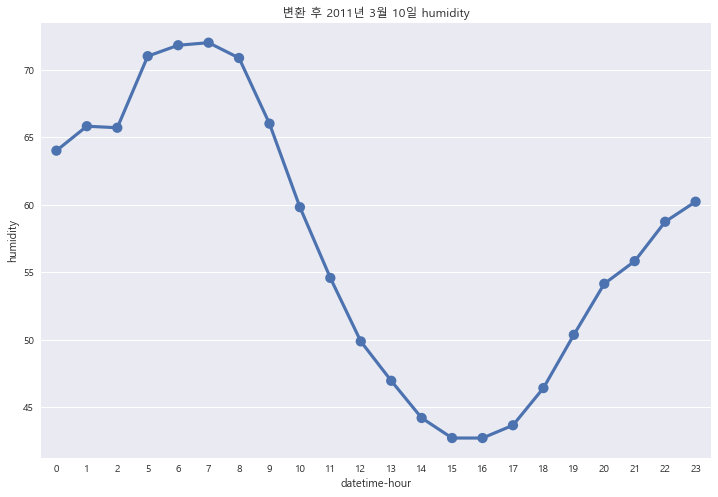

In [108]:
get_pointplot('datetime-hour', 'humidity', df[ (df['datetime-month']== 3) & (df['datetime-day'] == 10) & (df['datetime-year'] == 2011) ], '변환 후 2011년 3월 10일 humidity')

하루 평균 humidity와 유사하게 변환되었다는 것을 확인할 수 있다.

In [109]:
cols = ['humidity', 'windspeed', 'count']
df.groupby('weather').mean()[cols]

humidity  windspeed       count
weather                                  
1        56.716769  12.892542  205.236791
2        69.136690  12.179905  178.955540
3        82.685548  14.071248  118.846333
4        86.000000   6.003200  164.000000

In [110]:
cols = ['humidity', 'windspeed', 'count']
df.groupby('datetime-month').mean()[cols]

humidity  windspeed       count
datetime-month                                  
1               55.911765  14.582959   90.366516
2               56.296337  13.963707  110.003330
3               58.073546  15.363249  148.169811
4               55.697470  15.581090  184.160616
5               68.084430  12.293956  219.459430
6               58.759868  12.348930  242.031798
7               58.402412  11.019928  235.325658
8               63.010965  11.931179  234.118421
9               70.980198  11.575698  233.805281
10              69.412733  11.226457  227.699232
11              60.722283  13.126587  193.677278
12              68.383772  10.682489  175.614035

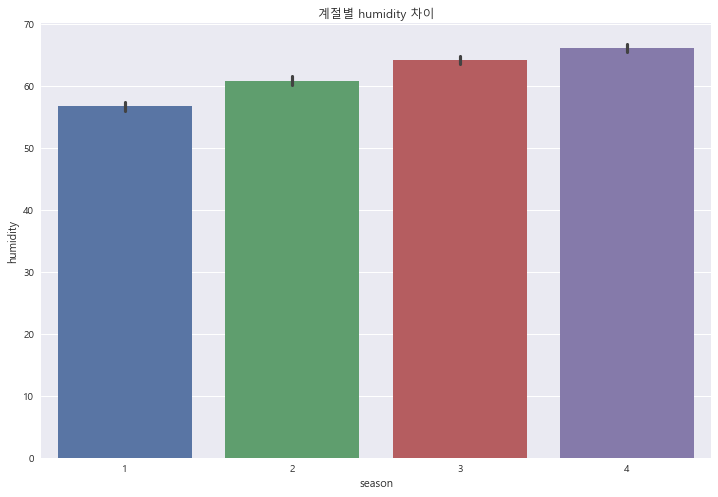

In [111]:
get_barplot('season', 'humidity', df, '계절별 humidity 차이')

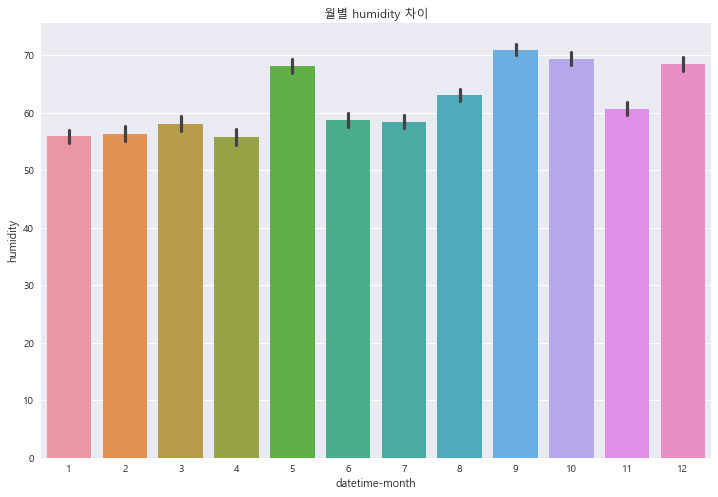

In [112]:
get_barplot('datetime-month', 'humidity', df, '월별 humidity 차이')

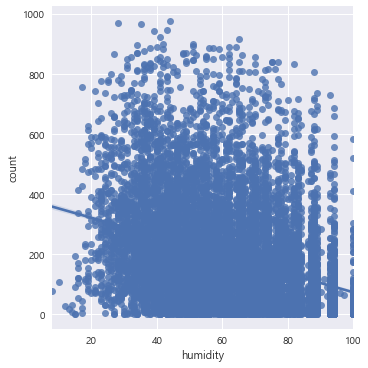

In [113]:
sns.lmplot(x='humidity', y='count', data=df)

Text(0.5, 1.0, 'humidity Log Transformation After')

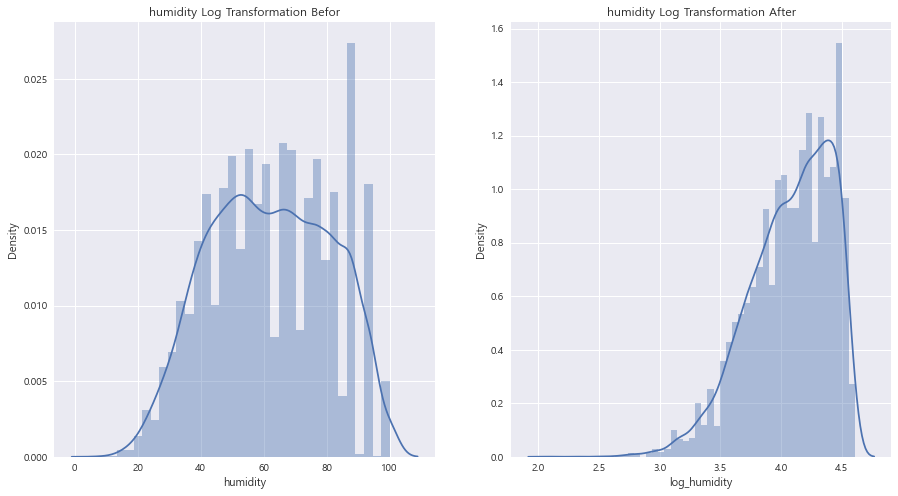

In [114]:
# 로그 변환
df['log_humidity']= df['humidity'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['humidity'], ax = ax[0])
sns.distplot(df['log_humidity'], ax = ax[1])
ax[0].set_title('humidity Log Transformation Befor')
ax[1].set_title('humidity Log Transformation After')

humidity 자체의 특성은 이미 계절을 세분화하는데 반영되었디.

또한 humidity는 로그 변환을 하지 않는 것이 좋다.

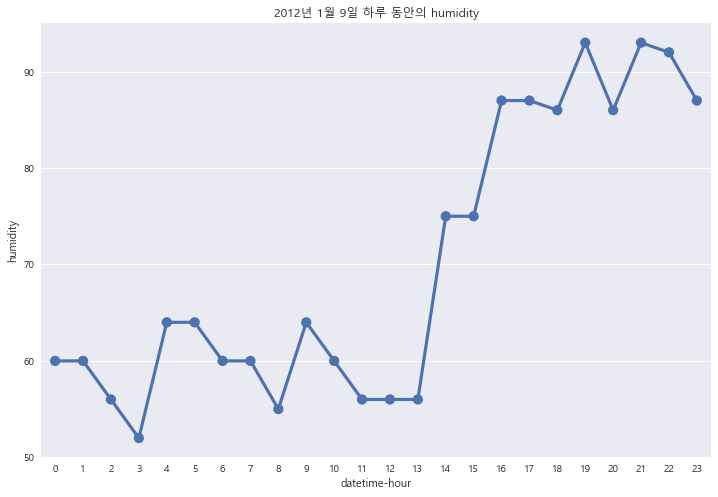

In [115]:
get_pointplot('datetime-hour', 'humidity', df[(df['datetime-year'] == 2012) & (df['datetime-month'] == 1) & (df['datetime-day'] == 9)], '2012년 1월 9일 하루 동안의 humidity')

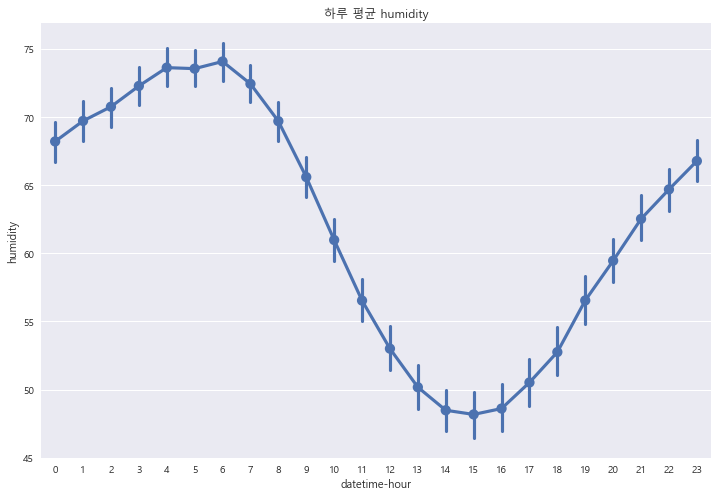

In [116]:
get_pointplot('datetime-hour', 'humidity', df, '하루 평균 humidity')

Text(0.5, 1.0, '히루 평균 humidity')

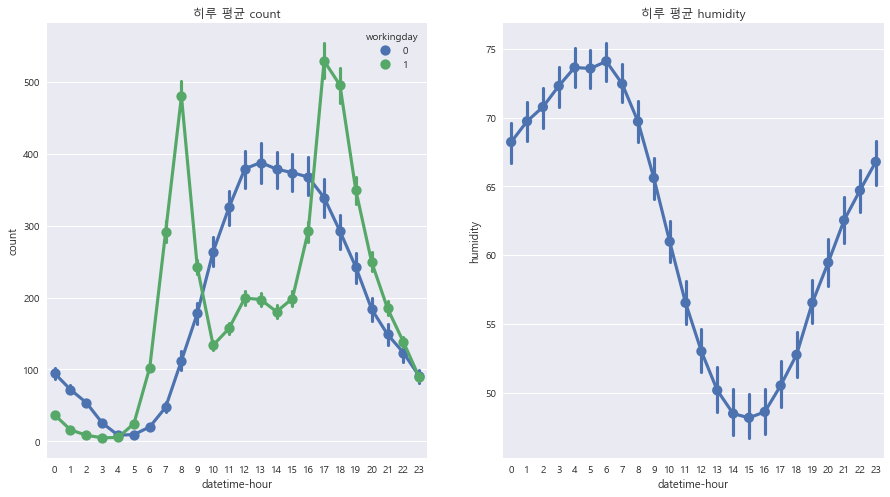

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.pointplot(x='datetime-hour', y='count', data = df, ax = ax[0], hue='workingday')
sns.pointplot(x='datetime-hour', y='humidity', data = df, ax = ax[1])
ax[0].set_title('히루 평균 count')
ax[1].set_title('히루 평균 humidity')

주말의 칼럼만 비교해 보면 습도가 낮아질수록 자전거 대여량이 많다는 것을 확인할 수 있는데 이는 당연히 낮에 일사량이 높아지기 때문에 습도가 줄어드는 것은 당연하며 사람은 대부분 낮에 활동하는 것도 있을 수 았지만 그래도 습도는 자전거 대여량에 영향을 줄 수 있다.

습도 또한 1시간 단위로 측정되어서 하루의 전체적인 습도를 나타낼 수 없다고 생각하여

하루의 전체적인 평균 습도를 나타내는 칼럼과 가장 핫한 시간대의 평균 습도를 나타내는 칼럼을 새롭게 만들 예정이다.

## 번외
실외 스포츠의 대명사인 마라톤의 경우 기온은 섭씨 9 ~ 13도, 습도 30 ~ 40% 가 가장 기록이 잘나온다고 한다.  
출처: https://blog.naver.com/winixpposong/130166507887  

우선 이 사실에 기반하여 마라톤의 기록이 잘나온다는 것은 실외활동을 하기 가장 좋은 날이지 않을까? 라는 생각을 가지며 가장 자전거 대여량이 많은 시간대인 점심 시간대가 습도가 가장 활동을 하기에 적절하다고 볼 수 있다. 그런데 이 사실은 누구나 점심시간대에 많이 활동을 하기 때문일 수도 있다. 그러나 우리가 과거부터 점심 시간대에 활동을 많이 하는 시간대로 결정된 이유가 점심 시간대가 활동하기에 쾌적한 습도를 가지고 있기 때문이라고도 생각할 수 있을 것이다.

### humidity_mean : 하루의 평균 습도를 나타내는 칼럼

In [117]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 하루 humidity의 평균을 구하는 함수
humidity_mean_index_list = df.groupby('datetime-year-month-day').mean()['humidity'].index.tolist()
humidity_mean_value_list = df.groupby('datetime-year-month-day').mean()['humidity'].values.tolist()
def get_humidity_mean(x):
    find_humidity_mean_index = humidity_mean_index_list.index(x)
    find_humidity_mean_value = humidity_mean_value_list[find_humidity_mean_index]
    
    return find_humidity_mean_value

In [118]:
df['humidity_mean'] = df['datetime-year-month-day'].map(get_humidity_mean)

Text(0.5, 1.0, 'humidity_mean Log Transformation After')

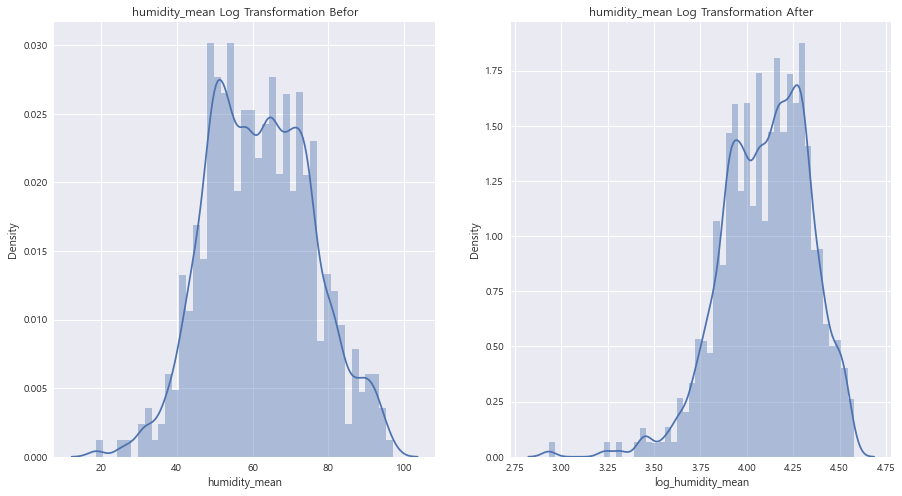

In [119]:
# 로그 변환
df['log_humidity_mean']= df['humidity_mean'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['humidity_mean'], ax = ax[0])
sns.distplot(df['log_humidity_mean'], ax = ax[1])
ax[0].set_title('humidity_mean Log Transformation Befor')
ax[1].set_title('humidity_mean Log Transformation After')

### hot_humidity_mean : 가장 핫한 시간대의 평균 습도를 나타내는 칼럼

In [120]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 가장 자전거 이용량이 많은 시간대에 humidity의 평균을 구하는 함수
hot_humidity_mean_index_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').mean()['humidity'].index.tolist()
hot_humidity_mean_value_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').mean()['humidity'].values.tolist()
def get_hot_humidity_mean(x):
    find_hot_humidity_mean_index = hot_humidity_mean_index_list.index(x)
    find_hot_humidity_mean_value = hot_humidity_mean_value_list[find_hot_humidity_mean_index]
    
    return find_hot_humidity_mean_value

In [121]:
df['hot_humidity_mean'] = df['datetime-year-month-day'].map(get_hot_humidity_mean)

Text(0.5, 1.0, 'hot_humidity_mean Log Transformation After')

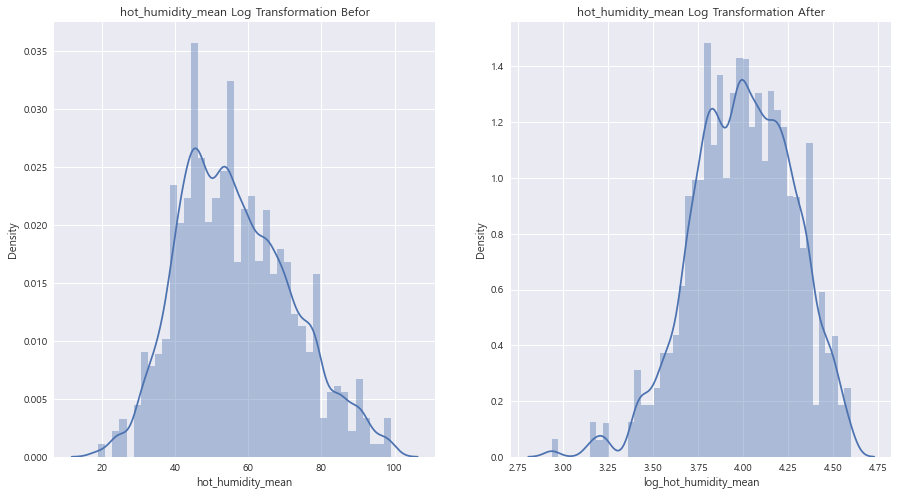

In [122]:
# 로그 변환
df['log_hot_humidity_mean']= df['hot_humidity_mean'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['hot_humidity_mean'], ax = ax[0])
sns.distplot(df['log_hot_humidity_mean'], ax = ax[1])
ax[0].set_title('hot_humidity_mean Log Transformation Befor')
ax[1].set_title('hot_humidity_mean Log Transformation After')

## windspeed: 풍속

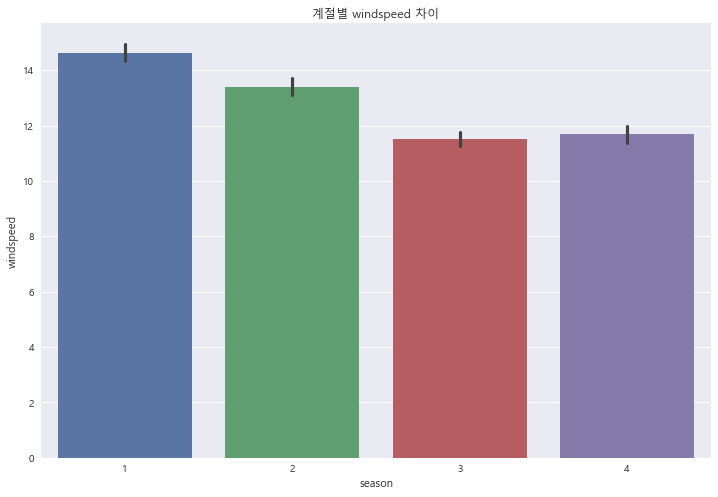

In [123]:
get_barplot('season', 'windspeed', df, '계절별 windspeed 차이')

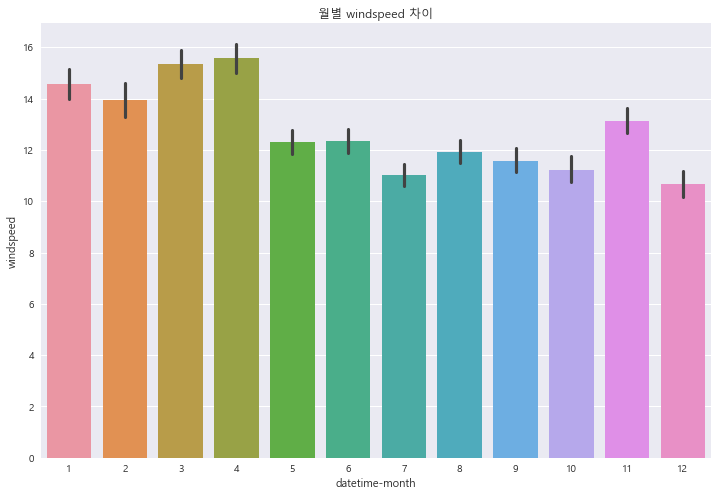

In [124]:
get_barplot('datetime-month', 'windspeed', df, '월별 windspeed 차이')

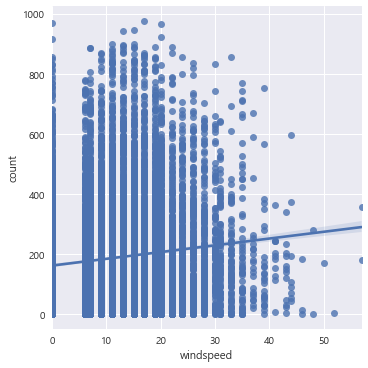

In [125]:
sns.lmplot(x='windspeed', y='count', data=df)

Text(0.5, 1.0, 'windspeed Log Transformation After')

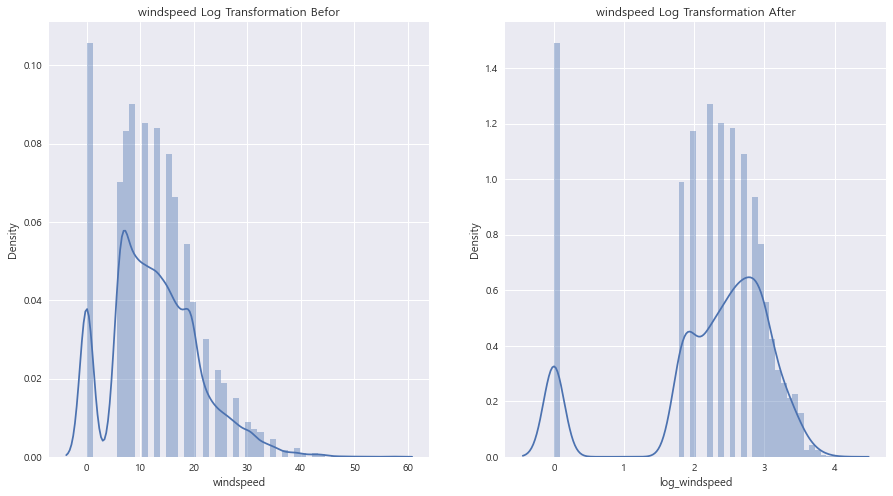

In [126]:
# 로그 변환
df['log_windspeed']= df['windspeed'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['windspeed'], ax = ax[0])
sns.distplot(df['log_windspeed'], ax = ax[1])
ax[0].set_title('windspeed Log Transformation Befor')
ax[1].set_title('windspeed Log Transformation After')

windspeed 자체의 특성은 이미 계절을 세분화하는데 반영되었다.

또한 windspeed 로그 변환을 하는 것이 좋다.

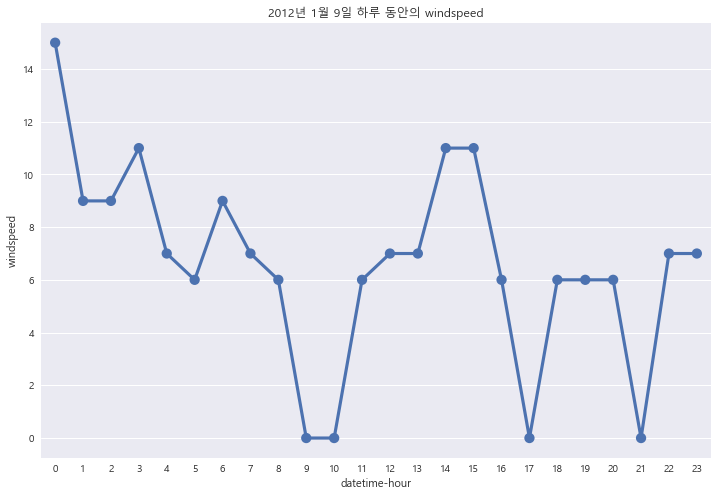

In [127]:
get_pointplot('datetime-hour', 'windspeed', df[(df['datetime-year'] == 2012) & (df['datetime-month'] == 1) & (df['datetime-day'] == 9)], '2012년 1월 9일 하루 동안의 windspeed')

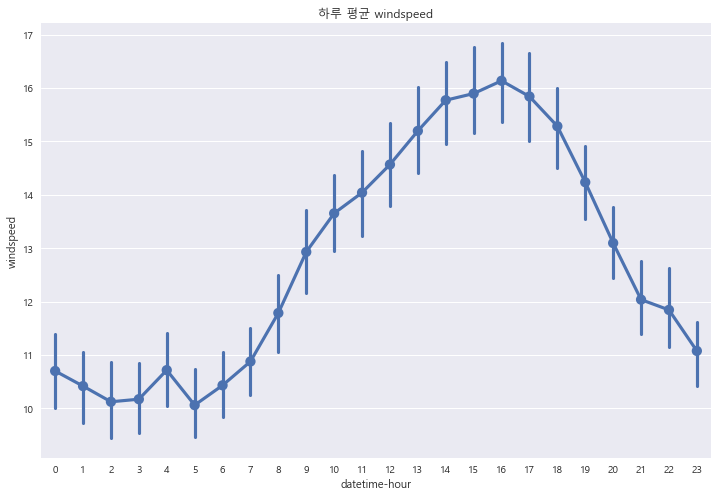

In [128]:
get_pointplot('datetime-hour', 'windspeed', df, '하루 평균 windspeed')

Text(0.5, 1.0, '히루 평균 windspeed')

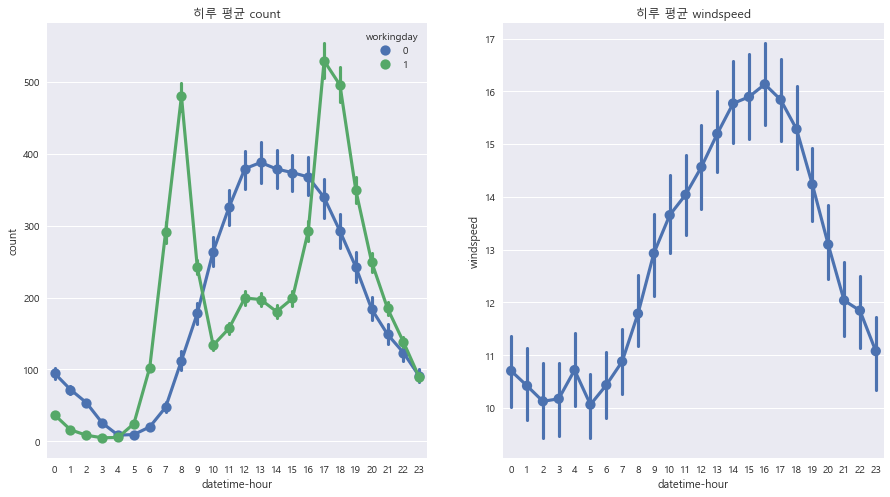

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.pointplot(x='datetime-hour', y='count', data = df, ax = ax[0], hue='workingday')
sns.pointplot(x='datetime-hour', y='windspeed', data = df, ax = ax[1])
ax[0].set_title('히루 평균 count')
ax[1].set_title('히루 평균 windspeed')

주말의 칼럼만 비교해 보면 풍속이 높아질수록 자전거 대여량이 많다는 것을 확인할 수 있는데 실제로 count와 windspeed의 상관계수 값은 매우 낮게 나온다. 따라서 이는 그냥 시간과 더 큰 상관성을 받지 않을까? 리는 생각을 하며 모델에 넣어 정확도를 비교하는 것이 더 좋다고 판단된다.

풍속 또한 1시간 단위로 측정되어서 하루의 전체적인 풍속을 나타낼 수 없다고 생각하여

하루의 전체적인 평균 풍속을 나타내는 칼럼과 가장 핫한 시간대의 평균 풍속을 나타내는 칼럼을 새롭게 만들 예정이다.

### windspeed_mean : 하루의 평균 풍속을 나타내는 칼럼

In [129]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 하루 windspeed의 평균을 구하는 함수
windspeed_mean_index_list = df.groupby('datetime-year-month-day').mean()['windspeed'].index.tolist()
windspeed_mean_value_list = df.groupby('datetime-year-month-day').mean()['windspeed'].values.tolist()
def get_windspeed_mean(x):
    find_windspeed_mean_index = windspeed_mean_index_list.index(x)
    find_windspeed_mean_value = windspeed_mean_value_list[find_windspeed_mean_index]
    
    return find_windspeed_mean_value

In [130]:
df['windspeed_mean'] = df['datetime-year-month-day'].map(get_windspeed_mean)

Text(0.5, 1.0, 'windspeed_mean Log Transformation After')

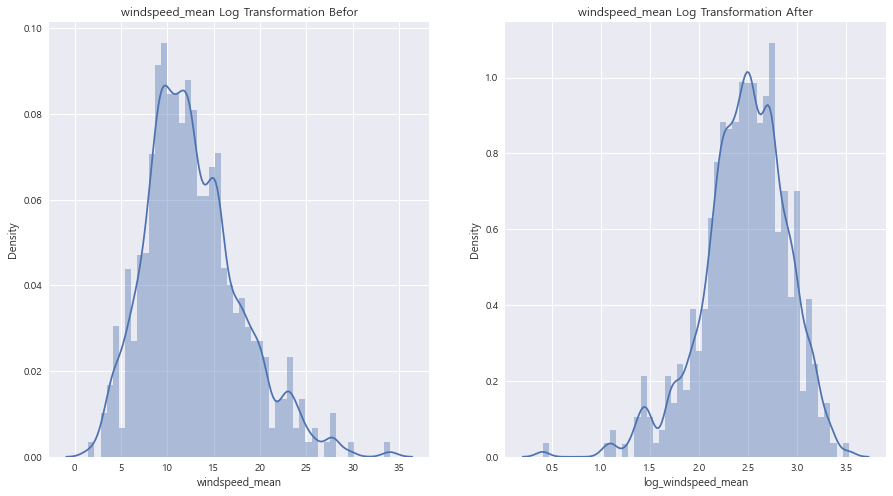

In [131]:
# 로그 변환
df['log_windspeed_mean']= df['windspeed_mean'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['windspeed_mean'], ax = ax[0])
sns.distplot(df['log_windspeed_mean'], ax = ax[1])
ax[0].set_title('windspeed_mean Log Transformation Befor')
ax[1].set_title('windspeed_mean Log Transformation After')

### hot_windspeed_mean : 가장 핫한 시간대의 평균 풍속을 나타내는 칼럼

In [132]:
# year-month-day를 묶은 칼럼 생성
df['datetime-year-month-day'] = df['datetime-year'].astype('str') + '-' + df['datetime-month'].astype('str') + '-' + df['datetime-day'].astype('str')

# 가장 자전거 이용량이 많은 시간대에 windspeed의 평균을 구하는 함수
hot_windspeed_mean_index_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').mean()['windspeed'].index.tolist()
hot_windspeed_mean_value_list = df[(df['datetime-hour'] >= 7) & (df['datetime-hour'] <= 20)].groupby('datetime-year-month-day').mean()['windspeed'].values.tolist()
def get_hot_windspeed_mean(x):
    find_hot_windspeed_mean_index = hot_windspeed_mean_index_list.index(x)
    find_hot_windspeed_mean_value = hot_windspeed_mean_value_list[find_hot_windspeed_mean_index]
    
    return find_hot_windspeed_mean_value

In [133]:
df['hot_windspeed_mean'] = df['datetime-year-month-day'].map(get_hot_windspeed_mean)

Text(0.5, 1.0, 'hot_windspeed_mean Log Transformation After')

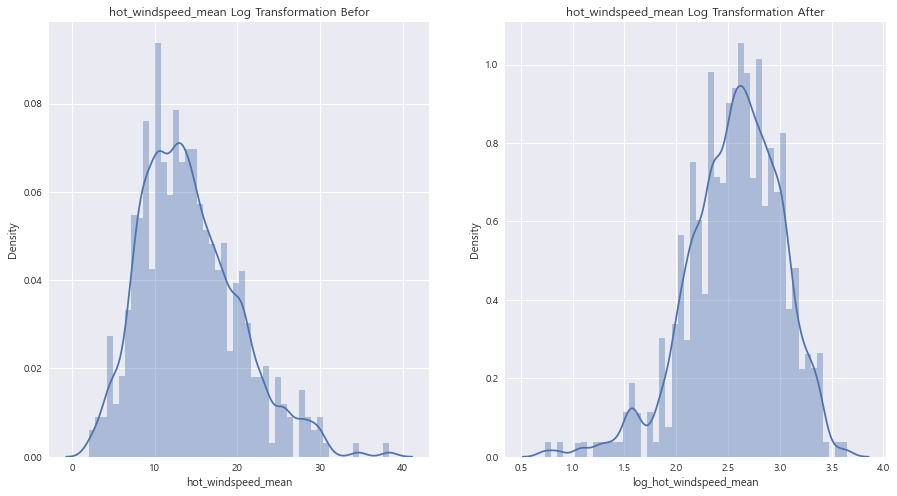

In [134]:
# 로그 변환
df['log_hot_windspeed_mean']= df['hot_windspeed_mean'].map(lambda x : np.log(x) if x != 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['hot_windspeed_mean'], ax = ax[0])
sns.distplot(df['log_hot_windspeed_mean'], ax = ax[1])
ax[0].set_title('hot_windspeed_mean Log Transformation Befor')
ax[1].set_title('hot_windspeed_mean Log Transformation After')

## casual: 비회원의 대여량

Text(0.5, 1.0, 'casual Log Transformation After')

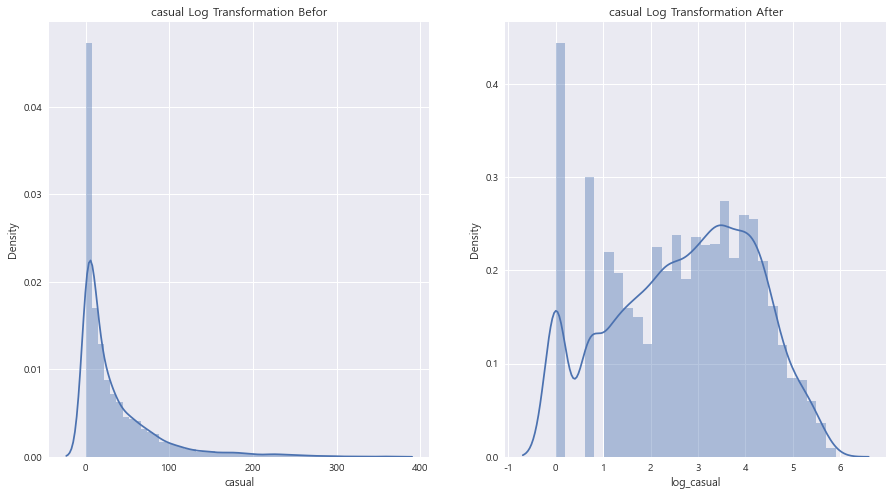

In [135]:
# 로그 변환
df['log_casual']= df['casual'].map(lambda x : np.log1p(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['casual'], ax = ax[0])
sns.distplot(df['log_casual'], ax = ax[1])
ax[0].set_title('casual Log Transformation Befor')
ax[1].set_title('casual Log Transformation After')

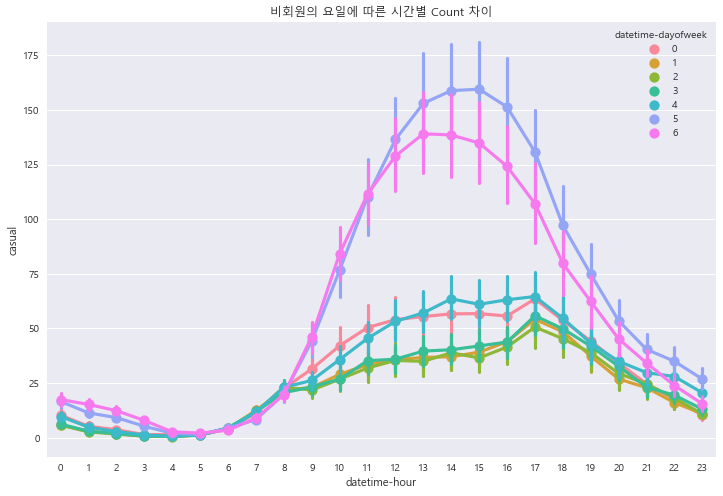

In [136]:
get_pointplot('datetime-hour', 'casual', df, '비회원의 요일에 따른 시간별 Count 차이', hue='datetime-dayofweek')

casual의 경우 로그 변환을 해주는 것이 좋다.

비회원의 경우 대부분이 주말에 나들이를 위해서 대여량이 높으며 츨퇴근시간대 보다는 점심시간대에 대여량이 높다는 것을 알 수 있다.

따라서 casual과 registered를 따로 예측한 후 더해주는 것이 좋다고 생각된다.

## registered: 회원의 대여량

Text(0.5, 1.0, 'registered Log Transformation After')

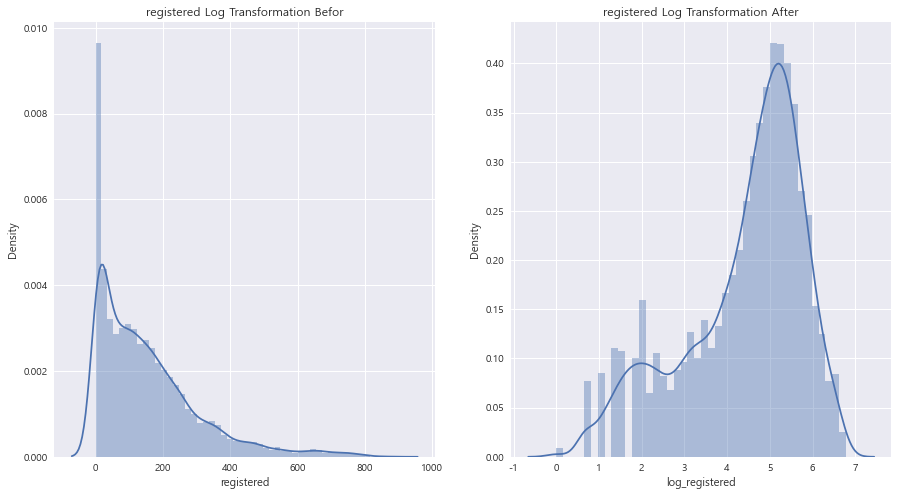

In [137]:
# 로그 변환
df['log_registered']= df['registered'].map(lambda x : np.log1p(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['registered'], ax = ax[0])
sns.distplot(df['log_registered'], ax = ax[1])
ax[0].set_title('registered Log Transformation Befor')
ax[1].set_title('registered Log Transformation After')

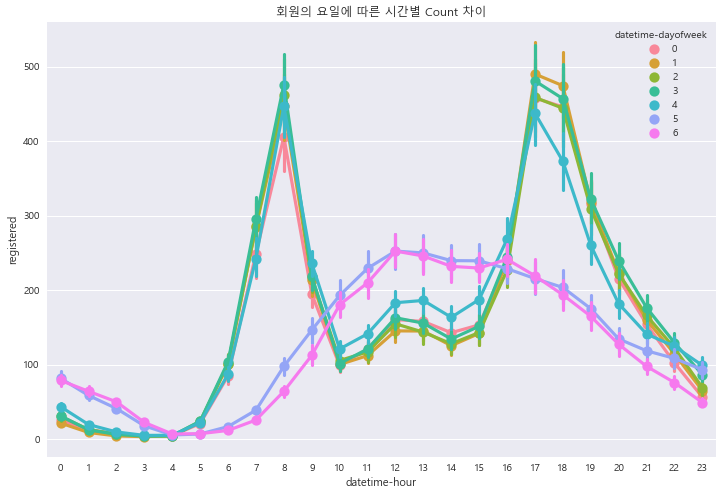

In [138]:
get_pointplot('datetime-hour', 'registered', df, '회원의 요일에 따른 시간별 Count 차이', hue='datetime-dayofweek')

registered 경우 로그 변환을 해주는 것이 좋다.

회원의 경우 count와 큰 차이를 보이지 않는다.

하지만 비회원과 대여 방식의 차이를 보인다.

따라서 casual과 registered를 따로 예측한 후 더해주는 것이 좋다고 생각된다.

## count: 전체 대여량 (casual + registered)

Text(0.5, 1.0, 'count Log Transformation After')

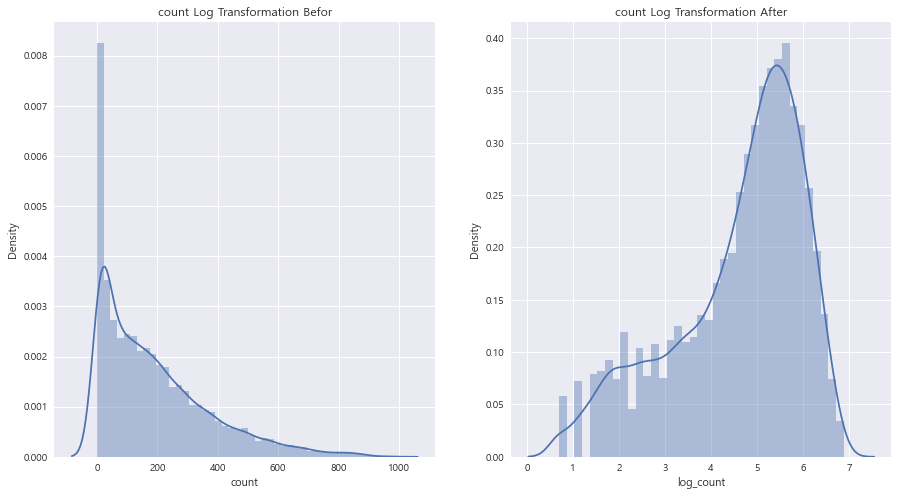

In [139]:
# 로그 변환
df['log_count']= df['count'].map(lambda x : np.log1p(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(df['count'], ax = ax[0])
sns.distplot(df['log_count'], ax = ax[1])
ax[0].set_title('count Log Transformation Befor')
ax[1].set_title('count Log Transformation After')

count 경우 로그 변환을 해주는 것이 좋다.

count 는 casual과 registered 을 더한 값이며 casual과 registered 대여의 차이를 보이기 때문에 

따로 예측 후 서로를 더해주는 것이 최좋 모델링에 큰 도움이 될 것이다.

## 과제3 - 2. 수치형 변수 변환 후 수치형 변수간 상관관계 파악

In [140]:
num_cols = ['temp', 'log_temp', 'temp_mean', 'log_temp_mean', 'hot_temp_mean', 'log_hot_temp_mean',
            'atemp',  'log_atemp', 'atemp_mean', 'log_atemp_mean', 'hot_atemp_mean', 'log_hot_atemp_mean',
            'humidity', 'log_humidity', 'humidity_mean', 'log_humidity_mean','hot_humidity_mean', 'log_hot_humidity_mean',
            'windspeed', 'log_windspeed', 'windspeed_mean', 'log_windspeed_mean', 'hot_windspeed_mean', 'log_hot_windspeed_mean',
            'casual', 'log_casual',
            'registered', 'log_registered',
            'count', 'log_count']

num_cols_df_cor = df[num_cols].corr()

num_cols_df_cor.style.background_gradient(cmap='YlGnBu').set_precision(3)

수가 너무 많아져서 시각화에 어려움이 있어 temp와 atemp를 묶고 humidity와 winspeed를 묶어 시각화를 진행하겠다.

In [141]:
num_cols_temp_atemp = [ 'temp', 'log_temp', 'temp_mean', 'log_temp_mean', 'hot_temp_mean', 'log_hot_temp_mean',
                        'atemp',  'log_atemp', 'atemp_mean', 'log_atemp_mean', 'hot_atemp_mean', 'log_hot_atemp_mean',
                        'casual', 'log_casual',
                        'registered', 'log_registered',
                        'count', 'log_count']


num_cols_temp_atemp_df_cor = df[num_cols_temp_atemp].corr()

num_cols_temp_atemp_df_cor.style.background_gradient(cmap='YlGnBu').set_precision(3)

In [142]:
num_cols_humidity_windspeed = ['humidity', 'log_humidity', 'humidity_mean', 'log_humidity_mean','hot_humidity_mean', 'log_hot_humidity_mean',
                               'windspeed', 'log_windspeed', 'windspeed_mean', 'log_windspeed_mean', 'hot_windspeed_mean', 'log_hot_windspeed_mean',
                               'casual', 'log_casual',
                               'registered', 'log_registered',
                               'count', 'log_count']

num_cols_humidity_windspeed_df_cor = df[num_cols_humidity_windspeed].corr()

num_cols_humidity_windspeed_df_cor.style.background_gradient(cmap='YlGnBu').set_precision(3)

분석 결과 수치형 변수를 변환한 후 전체적인 상관계수는 하락했다. 하지만 상관계수가 낮다고 예측에 도움이 안되는 것은 아니기 때문에 모델에 반영을 하며 결과를 비교하며 Feature를 Selection하는 과정이 필요할 것이다. 

# 3. Feature Engineering 결과 & Insight & 한계점

### 위 자료는 2011년과 2012년의 각 월별 19일까지의 공유 자전거 대여량에 대한 데이터이다.

### 분석 결과 생성한 Feature는 크게 날짜와 관련된 Feature와 날씨 및 계절과 관련된 Feature로 나눌 수 있다.


* **날짜와 관련된 Feature**
   * `datetime-year` = 년도를 나타내는 Feature  
   : 2011년과 2012년에 자전거 대여량의 차이가 존재하지만 2011년과 2012년의 자전거 대여량의 추세가 비슷하기 때문에 2011년이 상대적으로 공유 자전거 대여 초기이기 때문에 대여량이 적은것으로 생각된다.
   * `datetime-month` = 월을 나타내는 Feature  
   : 월별로 자전거의 대여량에 큰 차이를 보이며 대부분 여름과 가을인 달에 대여량이 많다.
   * `datetime-day` = 일을 나타내는 Feature  
   : 19일까지의 데이터만 존재하며 일별로 대여량의 차이는 존재하지는 않는다.
   * `datetime-hour` = 시간을 나타내는 Feature  
   : 가장 중요한 Feature로 출퇴근 시간대의 대여량이 많은 것으로 판단된다. 하지만 주말의 경우 점심 시간대의 대여량이 많다. 
   * `datetime-dayofweek` = 요일을 나타내는 Feature  
   : 시간과 함께 시각화 했을시 평일과 주말에 대여량의 추세가 다르다는 것을 확인할 수 있다
   * `weekend` = 평일과 주말을 나타내는 Feature  
   : datetime-dayofweek를 평일과 주말로 나눠 묶은 칼럼이다. 평일과 주말에 자전거 대여량이 많은 시간대가 다르다는 것을 확인할 수 있다. 그러나 기존에 존재하는 workingday칼럼이 공휴일과 주말을 모두 나타낼 수 있기 때문에 workingday 칼럼을 활용하는 것이 더 좋을 것으로 판단된다.


* **날씨 및 계절과 관련된 Feature**
  * `segment_season` = 계절을 조금 더 세분화한 Feature  
   : 기존의 season Feature을 더 세분화하여 나타낸 칼럼으로 여름과 가을에 대여량이 많다는 것을 확인할 수 있다.
  * `weather_median` = 하루의 전체적인 날씨를 숫자로 나타내는 Feature  
   : weather을 가지고 만든 하루의 날씨의 중앙값을 구해 그 값을 하루의 전체적인 날씨를 나타내는 칼럼으로 만들었다.
  * `weather_median_state` = 하루 날씨의 전체적인 상태를 긍정과 부정으로 구분하는 Feature  
   : weather_median만을 활용하면 과적합이 발생할 수 있다고 생각하여 weather_median을 가지고 날씨의 상태의 긍정과 부정으로 구분하는 값으로 변환한 칼럼이다.
  * `hot_weather_median` = 가장 자전거 이용량이 많은 시간대(7시 ~ 20시 까지)에 전체적인 날씨를 숫자로 나타내는 Feature  
   : 가장 자전거 이용량이 많은 시간대를 활용하여 weather_median과 동일한 방식으로 만든 칼럼이다.
  * `hot_weather_median_state` = 가장 자전거 이용량이 많은 시간대(7시 ~ 20시 까지)에 날씨의 전체적인 상태를 긍정과 부정으로 구분하는 Feature   
   : hot_weather_median 또한 과적합이 발생할 수 있다고 생각하여 weather_median_state를 만든 방식과 동일한 방식으로 만들었다
  * `log_temp, temp_mean, log_temp_mean, hot_temp_mean, log_hot_temp_mean`  
    `log_atemp, atemp_mean, log_atemp_mean, hot_atemp_mean, log_hot_atemp_mean`  
    `log_humidity, humidity_mean, log_humidity_mean, hot_humidity_mean, log_hot_humidity_mean`  
    `log_windspeed, windspeed_mean, log_windspeed_mean, hot_windspeed_mean, log_hot_windspeed_mean`  
   : weather 칼럼과 비슷한 방식으로 접근한 칼럼들로 하루의 평균 온도, 체감 온도, 습도, 풍속을 만들고 가장 핫한 시간대의 평균을 또 만든 칼럼이다. 그 후 각 칼럼을 로그 변환 하였다. 상관계수 값이 떨어지긴 했지만 모델을 통해서 차이를 확인하며 Feature를 Selection를 하는 과정이 필요하다고 생각된다.  


* **target**
  * `log_casual` = 비회원의 대여량을 로그 변환  
   : 분포가 한쪽으로 치우쳐저 있어 정규분포 형태로 만들기 위해 로그 변환한 칼럼이다. 비회원의 경우 주로 주말에 자전거를 이용하며 뢰원과 달리 평일에도 모두 점심 시간대에 자전거 대여량이 많다는 것을 확인할 수 있다
  * `log_registered` = 회원의 대여량을 로그 변환  
   : 분포가 한쪽으로 치우쳐저 있어 정규분포 형태로 만들기 위해 로그 변환한 칼럼이다. count와 동일한 추세를 가진다.
  * `log_count` = 전체 대여량을 로그 변환   
   : 분포가 한쪽으로 치우쳐저 있어 정규분포 형태로 만들기 위해 로그 변환한 칼럼이다. casual과 registered를 더한 값과 동일하기 때문에 모델 예측시 두 값을 따로 예측하거나 count만을 예측하거나 2가지 방식으로 모델을 만들 수 있다. 개인적인 생각으로는 회원과 비회원의 대여량의 추세가 다르기 때문에 따로 예측 후 값을 더하는 것이 더 모델의 성능을 높일 수 있다고 생각된다.


* **그 외 기존 Feature**
  * `season` = 계절을 나타내는 Feature   
   : 계절마다 자전거 대여량의 차이가 존재한다는 것을 알 수 있다.
  * `workingday` = 근무일을 나타내는 Feature    
   : 근무일과 쉬는날에 자전거 대여의 추세 차이가 존재한다는 것을 알 수 있다. 근무일이 아닌날이 공휴일 + 주말을 모두 포함하기 때문에 새롭게 만든 weekend Feature보다 더 좋은 Feature이라고 생각된다.
  * `weather` = 1시간 단위의 날씨를 나타내는 Feature    
   : 날씨에 따라 자전거 대여량의 차이가 존재한다는 것을 알 수 있다.



**분석 결과 `날씨가 좋은 여름과 가을에, 근무일에는 출퇴근 시간대에, 근무일이 아닌 날에는 점심 시간대에, 자전거 대여량이 많으며 비회원의 경우 대부분 쉬는날에 자전거를 이용하며 점심 시간대에 대여량이 많다.` 의 한문장으로 요약할 수 있다.**


* 유의사항  
  1. Feature를 대부분 조금 더  Feature 특성을 잘 살리기 위한 방식으로 만들었기 때문에 Feature간의 다중공선성 문제가 발생할 수 있으므로 모델을 만들어 결과를 비교해가며 Feature를 Selection하는 과정이 필요하다.
  2. log_casual과 log_registered로 나누어 예측한 후 두 값을 더하는 모델과 log_count를 예측하는 모델을 만들어 서로의 결과를 비교하여 더 나은 모델을 선택하는 것이 필요하다. 개인적인 생각으로는 log_casual과 log_registered 나누어 예측한 후 더하는 것이 더욱더 모델 성능 향상에 좋을 것으로 생각된다.
  3. 로그 변환된 Target을 예측값으로 활용한다면 예측 후 expm1을 해줘 기존 스케일로 다시 변환해주는 과정이 필요하다.
  
  
* 한계점
  1. humidity와 windspeed의 연관성을 활용하여 windspeed의 특성을 조금 더 모델에 반영할 수 있는 새로운 Feature를 만들 수 있을 것 같지만 그 방법을 잦지 못하였다. 하지만 계절을 나타내는 칼럼에 온도, 습도, 풍속 등의 특성이 반영되어 있다고 생각한다.
  2. 데이터가 2011 ~ 2012년 까지의 데이터만 주어졌기 때문에 지구온난화에 따른 온도 및 계절의 반영을 나타낼 수 없다는 것이 아쉽다.